# Importación de librerías y cargar base de datos

In [391]:
#Preparamos complementos, librerías y bases disponibles
import warnings

warnings.filterwarnings("ignore")

!pip install pandas numpy sweetviz seaborn matplotlib scikit-learn
!pip install kneed

#Instalación de complemento
!pip install sweetviz

#importar librerias
#importar librerias
import pandas as pd
import numpy as np
import sweetviz as sv
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import kneed as kd

from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import ShuffleSplit
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
%matplotlib inline


In [392]:
#Cargamos la base alojada en GitHub
BDD = pd.read_csv("https://raw.githubusercontent.com/veronica1908/T2_APRENDIZAJE_NO_SUPERVISADO/main/BASE_SIN_PROCESAR.csv", sep = ',')

#Verificamos la visualización
BDD.head()

,N°,Departamento defunción,Municipio defunción,Área defunción,Sitio defunción,Otro sitio de defunción,Nombre institución de defunción,Tipo de defunción,Fecha de Defunción,Hora de defunción,...,Barrio de fallecido,Vereda del fallecido,Seguridad social,Entidad administradora de salud,Probable manera de muerte,longitud,latitud,año,mes,Geolocalización
0,1.0,VALLE DEL CAUCA,BUGA,CABECERA MUNICIPAL,HOSPITAL / CLINICA,NaN,FUNDACION HOSPITAL SAN JOSE,NO FETAL,2019-11-30T00:00:00.000,07:00:00 P.M.,...,SUCRE,SIN INFORMACIÓN,SUBSIDIADO,ASOCIACIÓN MUTUAL EMPRESA SOLIDARIA DE SALUD D...,HOMICIDIO,-76.29216,3.90662,2019,11,POINT (-76.29216 3.90662)
1,2.0,VALLE DEL CAUCA,BUGA,CABECERA MUNICIPAL,CASA / DOMICILIO,NaN,FUNDACION HOSPITAL SAN JOSE,NO FETAL,2019-10-20T00:00:00.000,10:00:00 A.M.,...,LA VENTURA,SIN INFORMACIÓN,EXCEPCIÓN,SIN INFORMACIÓN,HOMICIDIO,-76.29216,3.90662,2019,10,POINT (-76.29216 3.90662)
2,3.0,VALLE DEL CAUCA,BUGA,CABECERA MUNICIPAL,HOSPITAL / CLINICA,NaN,FUNDACION HOSPITAL SAN JOSE,NO FETAL,2019-10-26T00:00:00.000,06:05:00 A.M.,...,LA REVOLUCION,SIN INFORMACIÓN,CONTRIBUTIVO,SERVICIO OCCIDENTAL DE SALUD - S.O.S. S.A.,HOMICIDIO,-76.29216,3.90662,2019,10,POINT (-76.29216 3.90662)
3,4.0,VALLE DEL CAUCA,BUGA,CABECERA MUNICIPAL,HOSPITAL / CLINICA,NaN,FUNDACION HOSPITAL SAN JOSE,NO FETAL,2019-10-29T00:00:00.000,02:00:00 P.M.,...,LOS ANGELES,SIN INFORMACIÓN,CONTRIBUTIVO,NUEVA EPS S.A.,HOMICIDIO,-76.29216,3.90662,2019,10,POINT (-76.29216 3.90662)
4,5.0,VALLE DEL CAUCA,BUGA,CABECERA MUNICIPAL,HOSPITAL / CLINICA,NaN,FUNDACION HOSPITAL SAN JOSE,NO FETAL,2019-11-30T00:00:00.000,02:58:00 A.M.,...,FUEN MAYOR,SIN INFORMACIÓN,CONTRIBUTIVO,NUEVA EPS S.A.,HOMICIDIO,-76.29216,3.90662,2019,11,POINT (-76.29216 3.90662)


# Preprocesamiento de los datos

##Información y estado de la base de datos

In [393]:
#Verificamos las dimensiones de la base
BDD.shape

(5308, 31)

In [394]:
# Vemos información de las variables, como datos NO nulos y tipo de dato
BDD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5308 entries, 0 to 5307
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   N°                               4167 non-null   float64
 1   Departamento defunción           5308 non-null   object 
 2   Municipio defunción              5308 non-null   object 
 3   Área defunción                   5305 non-null   object 
 4   Sitio defunción                  5308 non-null   object 
 5   Otro sitio de defunción          54 non-null     object 
 6   Nombre institución de defunción  5308 non-null   object 
 7   Tipo de defunción                5308 non-null   object 
 8   Fecha de Defunción               5308 non-null   object 
 9   Hora de defunción                4236 non-null   object 
 10  Sexo                             5308 non-null   object 
 11  Estado civil                     5257 non-null   object 
 12  Edad                

In [395]:
# Empezamos eliminando la variable N° que funciona como un identificador de losd atos de la base y que no aporta para el ejercicio.
BDD.drop(['N°',], axis=1, inplace=True)

In [396]:
# Vemos la cantidad de datos nulos por variable
BDD.isnull().sum()

#Existen muchos datos nulos y como las dimensiones de la base son considerablemente grandes, se eliminarán las filas cuyos datos nulos pertenezcan a variables núméricas importantes y para las filas de texto, se agregará "Sin información"

Departamento defunción                0
Municipio defunción                   0
Área defunción                        3
Sitio defunción                       0
Otro sitio de defunción            5254
Nombre institución de defunción       0
Tipo de defunción                     0
Fecha de Defunción                    0
Hora de defunción                  1072
Sexo                                  0
Estado civil                         51
Edad                                136
Nivel educativo                      24
Último curso fallecido             1141
Ocupación                           205
Cultura, pueblo, rasgos físicos      22
País de residencia                    2
Departamento de residencia            2
Municipio de residencia               2
Area de residencia                    4
Barrio de fallecido                 210
Vereda del fallecido                  0
Seguridad social                     27
Entidad administradora de salud       0
Probable manera de muerte           640


##Ajuste de las variables de la base de datos

In [397]:
#Vamos a verificar cada columna para tomar decisiones en el ajuste de datos de cada una de ellas
#Como la columna "Departamento defunción" no tiene datos nulos, verificamos entonces sus categorías en orden alfabético para detectar posibles errores en el ingreso de datos
sorted(BDD['Departamento defunción'].unique())
#Verificamos la cantidad de datos por departamento
BDD['Departamento defunción'].value_counts()


VALLE DEL CAUCA       5299
RISARALDA                2
CUNDINAMARCA             1
SANTA FE DE BOGOTÁ       1
TOLIMA                   1
QUINDIO                  1
NARIÑO                   1
CASANARE                 1
GUAVIARE                 1
Name: Departamento defunción, dtype: int64

In [398]:
#Como la gran mayoría de datos pertenecen al departamento del VALLE DEL CAUCA, nos centraremos en estos datos y eliminaremos los que pertenecen a otros departamentos
dep_elim = ['CUNDINAMARCA','SANTA FE DE BOGOTÁ','RISARALDA','TOLIMA','NARIÑO','CASANARE','GUAVIARE','QUINDIO']
BDD = BDD[~BDD['Departamento defunción'].isin(dep_elim)]

In [399]:
#Como la columna "Municipio defunción" tampoco tiene datos nulos, verificamos también sus categorías
sorted(BDD['Municipio defunción'].unique())
#se observa que pueden combinarse las categorías "CALIMA' y 'CALIMA (DARIEN)'

['ANDALUCIA',
 'BUENAVENTURA',
 'BUGA',
 'BUGALAGRANDE',
 'CALI (SANTIAGO DE CALI)',
 'CALIMA',
 'CALIMA (DARIEN)',
 'CARTAGO',
 'DAGUA',
 'EL CERRITO',
 'GINEBRA',
 'GUACARI',
 'GUADALAJARA DE BUGA',
 'JAMUNDI',
 'PALMIRA',
 'RESTREPO',
 'RIOFRIO',
 'SAN PEDRO',
 'TULUA',
 'YOTOCO',
 'YUMBO',
 'ZARZAL']

In [400]:
#Se combinan las categorías "CALIMA' y 'CALIMA (DARIEN)' y BUGA con GUADALAJARA DE BUGA
BDD['Municipio defunción'] = BDD['Municipio defunción'].replace({'CALIMA (DARIEN)': 'CALIMA'})
BDD['Municipio defunción'] = BDD['Municipio defunción'].replace({'BUGA': 'GUADALAJARA DE BUGA'})
#Verificamos
sorted(BDD['Municipio defunción'].unique())

['ANDALUCIA',
 'BUENAVENTURA',
 'BUGALAGRANDE',
 'CALI (SANTIAGO DE CALI)',
 'CALIMA',
 'CARTAGO',
 'DAGUA',
 'EL CERRITO',
 'GINEBRA',
 'GUACARI',
 'GUADALAJARA DE BUGA',
 'JAMUNDI',
 'PALMIRA',
 'RESTREPO',
 'RIOFRIO',
 'SAN PEDRO',
 'TULUA',
 'YOTOCO',
 'YUMBO',
 'ZARZAL']

In [401]:
#Columna "Área defunción" tiene 3 datos nulos, los llenamos con el texto "SIN INFORMACIÓN" y verificamos también sus categorías
#Agregamos información a celdas vacías
BDD['Área defunción'].fillna('SIN INFORMACIÓN', inplace=True)
#Verificamos categorías
sorted(BDD['Área defunción'].unique())

['"CENTRO POBLADO (Inspección,\r\ncorregimiento o caserío)"',
 'CABECERA MUNICIPAL',
 'CENTRO POBLADO (INSPECCIÓN, CORREGIMIENTO O CASERÍO)',
 'RURAL DISPERSO',
 'SIN INFORMACIÓN']

In [402]:
#Unificamos las categorías: "CENTRO POBLADO (Inspección,\r\ncorregimiento o caserío)" y 'CENTRO POBLADO (INSPECCIÓN, CORREGIMIENTO O CASERÍO)' como "CENTRO POBLADO"
BDD['Área defunción'] = BDD['Área defunción'].replace({'"CENTRO POBLADO (Inspección,\r\ncorregimiento o caserío)"': 'CENTRO POBLADO', 'CENTRO POBLADO (INSPECCIÓN, CORREGIMIENTO O CASERÍO)':'CENTRO POBLADO'})
#Verificamos ajustes
sorted(BDD['Área defunción'].unique())

['CABECERA MUNICIPAL', 'CENTRO POBLADO', 'RURAL DISPERSO', 'SIN INFORMACIÓN']

In [403]:
#Columna "Sitio defunción" no tiene datos nulos, verificamos categorías
sorted(BDD['Sitio defunción'].unique())
#No hay ajustes para esta variable

['CASA / DOMICILIO',
 'CENTRO / PUESTO DE SALUD',
 'HOSPITAL / CLINICA',
 'LUGAR DE TRABAJO',
 'OTRO',
 'SIN INFORMACIÓN',
 'VÍA PÚBLICA']

In [404]:
#Columna "Sitio defunción" no tiene datos nulos, verificamos categorías
sorted(BDD['Sitio defunción'].unique())
#No hay ajustes para esta variable

['CASA / DOMICILIO',
 'CENTRO / PUESTO DE SALUD',
 'HOSPITAL / CLINICA',
 'LUGAR DE TRABAJO',
 'OTRO',
 'SIN INFORMACIÓN',
 'VÍA PÚBLICA']

In [405]:
#Columna "Otro sitio de defunción" tiene 5254 nulos. Esta columna existe solo como complemento para la categoría "OTRO" de la variable "Sitio defunción",
#Por lo tanto, se reemplazará los datos nulos con el texto "NA" (no aplica), para las filas del resto de las categorías diferentes a "OTRO" que aparecen como nulos

#Agregamos información en celdas vacías
BDD['Otro sitio de defunción'].fillna('NA', inplace=True)

#Verificamos categorías
sorted(BDD['Otro sitio de defunción'].unique())


['AMBULANCIA',
 'AREA DE CULTIVO',
 'AREAS DE DEPORTE',
 'BARES TABERNAS CANTINAS',
 'BOSQUE BALDIO POTRERO',
 'CARRETERA',
 'CENTRO BIENESTAR DEL ANCIANO',
 'COMERCIO Y AREAS DE SERVICIO',
 'Domicilio',
 'FINCA',
 'HACIENDA',
 'HOGAR GERIATRICO LAS VELADORAS',
 'HOGARES INFANTILES Y GERIATRICOS',
 'HOSPEDAJES HOTELES RESIDENCIAS MOTELES',
 'LUGAR DE TRABAJO',
 'LUGAR PUBLICO SIN OTRA INDICACIÓN',
 'NA',
 'OTRO LUGAR ESPECIFICADO',
 'PARQUE',
 'PARQUEADERO ESTACIONAMIENTO',
 'PRISIÓN REFORMATORIOS',
 'PRISIÓNREFORMATORIOS',
 'RESTAURANTES ASADEROS SALSAMENTARIAS',
 'RIO ARROYO HUMEDAL RONDA LAGO EMBALSE',
 'SUPERMERCADOS ALMACENES TIENDAS',
 'TALLER',
 'VIA PUBLICA',
 'ZONA RURAL']

In [406]:
#Ponemos todas las categorías en mayúsculas, ya que solo "domicilio" está en minúscula.
BDD['Otro sitio de defunción'] = BDD['Otro sitio de defunción'].str.upper()
#Unificamos las categorías 'PRISIÓN REFORMATORIOS'y 'PRISIÓNREFORMATORIOS'
BDD['Otro sitio de defunción'] = BDD['Otro sitio de defunción'].replace({'PRISIÓNREFORMATORIOS': 'PRISIÓN REFORMATORIOS'})

#Verificamos nuevamente categorías
sorted(BDD['Otro sitio de defunción'].unique())

['AMBULANCIA',
 'AREA DE CULTIVO',
 'AREAS DE DEPORTE',
 'BARES TABERNAS CANTINAS',
 'BOSQUE BALDIO POTRERO',
 'CARRETERA',
 'CENTRO BIENESTAR DEL ANCIANO',
 'COMERCIO Y AREAS DE SERVICIO',
 'DOMICILIO',
 'FINCA',
 'HACIENDA',
 'HOGAR GERIATRICO LAS VELADORAS',
 'HOGARES INFANTILES Y GERIATRICOS',
 'HOSPEDAJES HOTELES RESIDENCIAS MOTELES',
 'LUGAR DE TRABAJO',
 'LUGAR PUBLICO SIN OTRA INDICACIÓN',
 'NA',
 'OTRO LUGAR ESPECIFICADO',
 'PARQUE',
 'PARQUEADERO ESTACIONAMIENTO',
 'PRISIÓN REFORMATORIOS',
 'RESTAURANTES ASADEROS SALSAMENTARIAS',
 'RIO ARROYO HUMEDAL RONDA LAGO EMBALSE',
 'SUPERMERCADOS ALMACENES TIENDAS',
 'TALLER',
 'VIA PUBLICA',
 'ZONA RURAL']

In [407]:
#Verificamos datos nulos
BDD['Otro sitio de defunción'].isnull().sum()

0

In [408]:
#Verificamos categorías de 'Nombre institución' de defunción que no tiene datos nulos
sorted(BDD['Nombre institución de defunción'].unique())
#Sin novedades en esta columna

['ANGIOGRAFIA DE OCCIDENTE LTDA',
 'CENTRO MEDICO IMBANACO CMI',
 'CLINCA LOS FARALLONES S.A SEDE CARRERA 46',
 'CLINICA AMIGA',
 'CLINICA COLSANITAS S.A  SEBASTIAN DEL BELALCAZAR',
 'CLINICA CRISTO REY CALI S.A.S',
 'CLINICA DE OCCIDENTE',
 'CLINICA DESA S.A.S',
 'CLINICA MARIANGEL DUMIAN MEDICAL',
 'CLINICA NUESTRA SEÑORA DE LOS REMEDIOS',
 'CLINICA NUEVA RAFAEL URIBE URIBE SAS',
 'CLINICA PALMA REAL',
 'CLINICA PALMIRA S.A.',
 'CLINICA REY DAVID',
 'CLINICA SAN FRANCISCO S.A.',
 'CLINICA SANTA SOFIA DEL PACIFICO LTDA',
 'CLINICA VERSALLES S.A.',
 'CLÍNICA UCI DEL RIO S.A.',
 'DIME CLINICA NEUROCARDIOVASCULAR S.A.',
 'E.S.E. HOSPITAL DEPARTAMENTAL MARIO CORREA RENGIFO',
 'E.S.E. HOSPITAL DEPÀRTAMENTAL TOMAS URIBE URIBE DE TULUA ESE EMPRESA SOCIAL DEL ESTADO',
 'E.S.E. HOSPITAL DIVINO NIÑO EMPRESA SOCIAL DEL ESTADO',
 'E.S.E. HOSPITAL LA BUENA ESPERANZA',
 'E.S.E. HOSPITAL UNIVERSITARIO DEL VALLE EVARISTO GARCIA EMPRESA SOCIAL DEL ESTADO',
 'ESTUDIO E INVERSIONES MEDICAS S A ESIMED S 

In [409]:
#Verificamos categorías de 'Tipo de defunción' de defunción que no tiene datos nulos
sorted(BDD['Tipo de defunción'].unique())
#Sin novedades en esta columna

['FETAL', 'NO FETAL']

In [410]:
#La variable 'Fecha de Defunción' no tiene datos nulos, pero se ajusta el formato
# Convertir a formato de fecha
BDD['Fecha de Defunción'] = pd.to_datetime(BDD['Fecha de Defunción'])
#Verificamos
BDD.info('Fecha de Defunción')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5299 entries, 0 to 5307
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Departamento defunción           5299 non-null   object        
 1   Municipio defunción              5299 non-null   object        
 2   Área defunción                   5299 non-null   object        
 3   Sitio defunción                  5299 non-null   object        
 4   Otro sitio de defunción          5299 non-null   object        
 5   Nombre institución de defunción  5299 non-null   object        
 6   Tipo de defunción                5299 non-null   object        
 7   Fecha de Defunción               5299 non-null   datetime64[ns]
 8   Hora de defunción                4227 non-null   object        
 9   Sexo                             5299 non-null   object        
 10  Estado civil                     5248 non-null   object     

In [411]:
#Como la columna "Hora de defunción" tiene 1072 datos vacíos, pero la columna anterior de fecha, contiene también la hora y no tenía datos nulos, se elimina la columna de hora para no considerarla.
BDD = BDD.drop('Hora de defunción', axis=1)

In [412]:
#Verificamos categorías de la columna 'sexo' que no tiene datos nulos.
sorted(BDD['Sexo'].unique())
#Sin novedades en esta columna

['FEMENINO', 'INDETERMINADO', 'MASCULINO']

In [413]:
#Agregamos la información a los datos vacíos de la columna "Estado civil" que tiene 51 datos nulos, con la anotación "SIN INFORMACIÓN"
BDD['Estado civil'].fillna('SIN INFORMACIÓN', inplace=True)

#Verificamos categorías de la columna 'Estado civil'
sorted(BDD['Estado civil'].unique())

['CASADO(A)',
 'ESTABA CASADO(A)',
 'ESTABA SEPARADO(A), DIVORCIADO(A)',
 'ESTABA SOLTERO(A)',
 'ESTABA VIUDO(A)',
 'NO CASADO(A) Y DOS AÑOS O MAS CON SU PAREJA',
 'NO CASADO(A) Y MENOS DE DOS AÑOS CON SU PAREJA',
 'NO ESTABA CASADO(A) Y LLEVABA DOS AÑOS O MÁS VIVIENDO CON SU PAREJA',
 'NO ESTABA CASADO(A) Y LLEVABA MENOS DE DOS AÑOS VIVIENDO CON SU PAREJA',
 'SEPARADO(A), DIVORCIADO(A)',
 'SIN INFORMACIÓN',
 'SOLTERO(A)',
 'VIUDO(A)']

In [414]:
#Vamos a unificar algunas categorías
BDD['Estado civil'] = BDD['Estado civil'].replace({'ESTABA CASADO(A)': 'CASADO(A)',
                                                   'NO CASADO(A) Y DOS AÑOS O MAS CON SU PAREJA':'UNIÓN LIBRE',
                                                   'NO CASADO(A) Y MENOS DE DOS AÑOS CON SU PAREJA':'UNIÓN LIBRE',
                                                   'NO ESTABA CASADO(A) Y LLEVABA DOS AÑOS O MÁS VIVIENDO CON SU PAREJA':'UNIÓN LIBRE',
                                                   'NO ESTABA CASADO(A) Y LLEVABA MENOS DE DOS AÑOS VIVIENDO CON SU PAREJA':'UNIÓN LIBRE',
                                                   'ESTABA SEPARADO(A), DIVORCIADO(A)':'SEPARADO (A)',
                                                   'SEPARADO(A), DIVORCIADO(A)':'SEPARADO (A)',
                                                   'ESTABA SOLTERO(A)':'SOLTERO(A)',
                                                   'ESTABA VIUDO(A)':'VIUDO(A)'})

#Verificamos ajustes
sorted(BDD['Estado civil'].unique())

['CASADO(A)',
 'SEPARADO (A)',
 'SIN INFORMACIÓN',
 'SOLTERO(A)',
 'UNIÓN LIBRE',
 'VIUDO(A)']

In [415]:
#Esta variable puede conmvertirse en una variable de tipo numérica de acuerdo con su naturaleza, ya que se puede ordenar menor a mayor nivel de compromiso que representa el estado civil, utilizando categorías numéricas
#Para lo cual agregaremos la columna "Nivel compromiso civil"
BDD['Nivel compromiso civil'] = BDD['Estado civil']

In [416]:
#Reajustamos las categorías
BDD['Nivel compromiso civil'] = BDD['Nivel compromiso civil'].replace({'SIN INFORMACIÓN': '0',
                                                   'SOLTERO(A)':'1',
                                                   'UNIÓN LIBRE':'2',
                                                   'CASADO(A)':'3',
                                                   'SEPARADO (A)':'4',
                                                   'VIUDO(A)':'5'})


#Convertimos la variable en entero
BDD['Nivel compromiso civil'] = BDD['Nivel compromiso civil'].astype(int)

#Verificamos ajustes
sorted(BDD['Nivel compromiso civil'].unique())

[0, 1, 2, 3, 4, 5]

In [417]:
#Como la edad es una variable que podría tener gran significancia en esta base de datos, tener datos vacíos no sería útil y llenarlos con la media podría sesgar la información.
#Considerando que el conjunto de datos es de buenas dimensiones, se decide eliminar las filas con valores nulos en esta variable.
BDD = BDD.dropna(subset=['Edad'])

#Verificamos datos nulos
BDD['Edad'].isnull().sum()

0

In [418]:
#Ahora verificamos que los datos sean coherentes en cuanto a la edad
sorted(BDD['Edad'].unique())

[1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 8.0,
 9.0,
 11.0,
 12.0,
 13.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0,
 100.0,
 101.0,
 102.0,
 103.0,
 104.0,
 105.0,
 107.0,
 110.0,
 1001.0,
 1007.0,
 1014.0,
 1016.0,
 1023.0,
 2002.0,
 2003.0,
 2004.0,
 2005.0,
 2009.0,
 2011.0,
 2020.0,
 2023.0,
 2025.0,
 3002.0,
 3003.0,
 3004.0,
 3005.0,
 4001.0,
 4002.0,
 4003.0,
 4004.0,
 4005.0,
 4007.0,
 4008.0,
 4012.0,
 4013.0,
 4014.0,
 4015.0,
 4016.0,
 4

In [419]:
#Como hay valores demasiado altos y esta podría ser una variable significativa, se eliminan las filas cuyos valores son mayores a 110 años 8 a partir de esa edad se observa un salto enorme que puede ser error de digitación)
#Convertimos la columna a tipo enteros
BDD['Edad'] = BDD['Edad'].astype(int)

#Eliminamos los valores mayores a 110
BDD = BDD[BDD['Edad'] <= 110]

#Verificamos nuevamente
sorted(BDD['Edad'].unique())


[1,
 2,
 3,
 4,
 5,
 6,
 8,
 9,
 11,
 12,
 13,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 107,
 110]

In [420]:
#Agregamos la información a los datos vacíos de la columna "Nivel educativo " que tiene 24 datos nulos, con la anotación "SIN INFORMACIÓN"
BDD['Nivel educativo'].fillna('SIN INFORMACIÓN', inplace=True)

#Verificamos categorías de la columna 'Nivel educativo '
sorted(BDD['Nivel educativo'].unique())

['BASICA PRIMARIA',
 'BASICA SECUNDARIA',
 'BÁSICA PRIMARIA',
 'BÁSICA SECUNDARIA',
 'ESPECIALIZACION',
 'MAESTRIA',
 'MAESTRÍA',
 'MEDIA ACADEMICA O CLASICA',
 'MEDIA ACADÉMICA O CLÁSICA',
 'MEDIA TECNICA',
 'MEDIA TÉCNICA',
 'NINGUNO',
 'NORMALISTA',
 'PREESCOLAR',
 'PROFESIONAL',
 'SIN INFORMACIÓN',
 'TECNICA PROFESIONAL',
 'TECNOLOGICA',
 'TECNOLÓGICA',
 'TÉCNICA PROFESIONAL']

In [421]:
#Vamos a unificar algunas categorías
BDD['Nivel educativo'] = BDD['Nivel educativo'].replace({'BASICA PRIMARIA': 'BÁSICA PRIMARIA',
                                                   'BASICA SECUNDARIA':'BÁSICA SECUNDARIA',
                                                   'MAESTRIA':'MAESTRÍA',
                                                   'MEDIA ACADEMICA O CLASICA':'MEDIA ACADÉMICA',
                                                   'MEDIA ACADÉMICA O CLÁSICA':'MEDIA ACADÉMICA',
                                                   'MEDIA TECNICA':'MEDIA TÉCNICA',
                                                   'TECNICA PROFESIONAL':'TÉCNICA PROFESIONAL',
                                                   'TECNOLOGICA':'TECNOLÓGICA',
                                                   'NORMALISTA':'MEDIA TÉCNICA'})

#Verificamos ajustes
sorted(BDD['Nivel educativo'].unique())

['BÁSICA PRIMARIA',
 'BÁSICA SECUNDARIA',
 'ESPECIALIZACION',
 'MAESTRÍA',
 'MEDIA ACADÉMICA',
 'MEDIA TÉCNICA',
 'NINGUNO',
 'PREESCOLAR',
 'PROFESIONAL',
 'SIN INFORMACIÓN',
 'TECNOLÓGICA',
 'TÉCNICA PROFESIONAL']

In [422]:
#Esta variable puede conmvertirse en una variable de tipo numériuca de acuerdo con su naturaleza, ya que se puede ordenar menor a mayor nivel de estudios utilizando categorías numéricas
#Para lo cual agregaremos la columna "Nivel educación"
BDD['Nivel educación'] = BDD['Nivel educativo']

In [423]:
#Reajustamos las categorías
BDD['Nivel educación'] = BDD['Nivel educación'].replace({'SIN INFORMACIÓN': '0',
                                                   'NINGUNO':'1',
                                                   'PREESCOLAR':'2',
                                                   'BÁSICA PRIMARIA':'3',
                                                   'BÁSICA SECUNDARIA':'4',
                                                   'MEDIA ACADÉMICA':'5',
                                                   'MEDIA TÉCNICA':'6',
                                                   'TÉCNICA PROFESIONAL':'7',
                                                   'TECNOLÓGICA':'8',
                                                   'PROFESIONAL':'9',
                                                   'ESPECIALIZACION':'10',
                                                   'MAESTRÍA':'11'})


#Convertimos la variable en entero
BDD['Nivel educación'] = BDD['Nivel educación'].astype(int)

#Verificamos ajustes
sorted(BDD['Nivel educación'].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [424]:
#Como la columna "Último curso fallecido" tiene 1141 datos vacíos, pero la columna anterior de "Nivel educativo", contiene información similar, se elimina esta columna de la base
BDD = BDD.drop('Último curso fallecido', axis=1)

##Variable OCUPACIÓN

In [425]:
#Agregamos la información a los datos vacíos de la columna "Ocupación" que tiene 205 datos nulos, con la anotación "SIN INFORMACIÓN"
BDD['Ocupación'].fillna('SIN INFORMACIÓN', inplace=True)

#Verificamos categorías de la columna 'Ocupación'
sorted(BDD['Ocupación'].unique())

['ABOGADOS',
 'ACTIVIDADES NO ESPECIFICADAS',
 'AGENTES COMERCIALES Y CORREDORES, NO CLASIFICADOS BAJO OTROS EPÍGRAFES',
 'AGENTES DE COMPRAS, INTERMEDIARIOS Y CONSIGNATARIOS',
 'AGENTES DE LA ADMINISTRACIÓN PÚBLICA EN ADUANAS, IMPUESTOS Y AFINES, NO CLASIFICADOS BAJO OTROS EPÍGRAFES',
 'AGENTES Y POLICIAS DE TRANSITO',
 'AGRICULTORES DE CULTIVOS PERMANENTES (PLANTACIONES DE ÁRBOLES Y ARBUSTOS)',
 'AGRICULTORES DE CULTIVOS TRANSITORIOS',
 'ALBAÑILES, MAMPOSTEROS Y AFINES',
 'ARTESANOS DE LA MADERA Y MATERIALES SIMILARES',
 'ASEADORES Y FUMIGADORES DE OFICINAS, HOTELES Y OTROS ESTABLECIMIENTOS',
 'ASISTENTES DE COMERCIO EXTERIOR',
 'AUXILIARES ADMINISTRATIVOS Y AFINES',
 'AUXILIARES DE ENFERMERÍA Y ODONTOLOGÍA',
 'AYUDANTE DE TALLER, MECÁNICA, VEHÍCULOS DE MOTOR Y AFINES',
 'CARPINTEROS DE ARMAR Y DE BLANCO',
 'CATADORES Y CLASIFICADORES DE ALIMENTOS Y BEBIDAS',
 'COCINEROS Y AFINES',
 'CONDUCTORES DE BUSES, MICROBUSES Y COLECTIVOS',
 'CONDUCTORES DE CAMIONES Y VEHÍCULOS PESADOS',
 'CON

In [426]:
#Como son tantas categorías en esta variable, vamos a clasificar las categorías de "Ocupación" en una nueva columna de nombre "OCUPACION", tomando la parte general del oficio
#Renombramos la columna general
BDD.columns = BDD.columns.str.replace('Ocupación', 'Ocupación específica')

#Creamos la nueva columna
BDD['OCUPACION'] = BDD['Ocupación específica']

In [427]:
#Clasificamos las categorías agrupándolas así:

A= ['AGENTES COMERCIALES Y CORREDORES, NO CLASIFICADOS BAJO OTROS EPÍGRAFES',
 'AGENTES DE COMPRAS, INTERMEDIARIOS Y CONSIGNATARIOS',
 'AGENTES DE LA ADMINISTRACIÓN PÚBLICA EN ADUANAS, IMPUESTOS Y AFINES, NO CLASIFICADOS BAJO OTROS EPÍGRAFES',
 'AGENTES DE LA POLICIA NACIONAL',
 'AGENTES Y POLICIAS DE TRANSITO']

B= 'AGENTES'

C= ['TÉCNICOS EN AGRONOMÍA, ZOOTECNIA Y SILVICULTURA',
 'TÉCNICOS EN DISEÑO Y DECORADORES',
 'TÉCNICOS TERAPEUTAS, QUIROPRÁCTICOS Y AFINES',
 'TÉCNICOS Y ASISTENTES EN FARMACIA',
 'TÉCNICOS Y ASISTENTES VETERINARIOS',
 'TÉCNICOS Y POSTSECUNDARIOS NO UNIVERSITARIOS EN CIENCIAS FÍSICAS, QUÍMICAS E INGENIERÍAS, NO CLASIFICADOS BAJO OTROS EPÍGRAFES',
 'TÉCNICOS, POSTSECUNDARIOS NO UNIVERSITARIOS EN INGENIERÍA CIVIL, ARQUITECTURA, AGRIMENSORES Y AFINES',
 'TÉCNICOS, POSTSECUNDARIOS NO UNIVERSITARIOS Y ASISTENTES DE SERVICIOS ADMINISTRATIVOS Y AFINES',
 'TÉCNICOS, POSTSECUNDARIOS NO UNIVERSITARIOS Y ASISTENTES EN OPERACIONES COMERCIALES, NO CLASIFICADOS BAJO OTROS EPÍGRAFES',
 'T╔CNICOS E HIGIENISTAS DENTALES',
 'T╔CNICOS EN AGRONOM═A, ZOOTECNIA Y SILVICULTURA',
 'T╔CNICOS Y ASISTENTES EN FARMACIA']

D= 'TÉCNICOS'

E= ['OPERADORES DE EQUIPOS ÓPTICOS Y ELECTRÓNICOS, NO CLASIFICADOS BAJO OTROS EPÍGRAFES',
 'OPERADORES DE INSTALACIONES DE TRATAMIENTO DE AGUA Y AFINES',
 'OPERADORES DE MEZCLADORAS Y DE HORNOS DE VIDRIER═A Y AFINES',
 'OPERADORES DE MÁQUINAS PARA PROCESAR CARNE, PESCADO Y MARISCOS',
 'OPERADORES DE TELARES Y OTRAS MÁQUINAS TEJEDORAS',
 'OPERARIOS DE LA CONSERVACIÓN DE FRUTAS, LEGUMBRES, VERDURAS Y AFINES',
 'OPERARIOS DE LA FOTOGRAFÍA Y AFINES',
 'OPERARIOS DEL TRATAMIENTO DE LA MADERA',
 'OPERARIOS EN CEMENTO ARMADO, ENFOSCADORES Y AFINES',
 'OBREROS DE CARGA',
 'OBREROS DE LA CONSTRUCCIÓN DE EDIFICIOS',
 'OBREROS DE PESCA, CAZA Y TRAMPA',
 'OBREROS FORESTALES',
 'OBREROS Y PEONES AGROPECUARIOS DE LABRANZA Y DE INVERNADERO']

F='OPERARIOS'

G=['PROFESORES DE EDUCACIËN PRIMARIA',
 'PROFESORES DE EDUCACIËN SECUNDARIA',
 'PROFESORES DE EDUCACIÓN PRIMARIA',
 'PROFESORES DE EDUCACIÓN SECUNDARIA',
 'PROFESORES DE UNIVERSIDADES Y OTROS ESTABLECIMIENTOS DE EDUCACIËN SUPERIOR',
 'PROFESORES DE UNIVERSIDADES Y OTROS ESTABLECIMIENTOS DE EDUCACIÓN SUPERIOR',
 'PROFESORES E INSTRUCTORES DE EDUCACIËN ESPECIAL',
 'PROFESORES E INSTRUCTORES DE EDUCACIÓN ESPECIAL', 'PROFESIONALES DE LA EDUCACIËN, NO CLASIFICADOS BAJO OTROS EP═GRAFES',
 'PROFESIONALES DE LA EDUCACIÓN, NO CLASIFICADOS BAJO OTROS EPÍGRAFES']

H= 'PROFESORES'

I= [ 'VENDEDORES A DOMICILIO Y POR TELÉFONO',
 'VENDEDORES AMBULANTES',
 'VENDEDORES EN QUIOSCOS Y PUESTOS DE MERCADO',
 'VENDEDORES, DEMOSTRADORES DE TIENDAS Y ALMACENES']

J= 'VENDEDORES'

K=[ 'DIRECTORES DE DEPARTAMENTOS DE PRODUCCIËN Y OPERACIONES EN COMERCIO MAYORISTA Y MINORISTAS',
 'DIRECTORES DE DEPARTAMENTOS DE PRODUCCIÓN Y OPERACIONES EN AGRICULTURA, CAZA, SILVICULTURA Y PESCA',
 'DIRECTORES DE DEPARTAMENTOS DE PRODUCCIÓN Y OPERACIONES EN COMERCIO MAYORISTA Y MINORISTAS',
 'DIRECTORES DE DEPARTAMENTOS DE PRODUCCIÓN Y OPERACIONES EN CONSTRUCCIÓN Y OBRAS PÚBLICAS',
 'DIRECTORES DE DEPARTAMENTOS DE PRODUCCIÓN Y OPERACIONES EN INDUSTRIAS MANUFACTURERAS Y EXTRACTIVAS',
 'DIRECTORES GENERALES, DE EMPRESAS O ENTIDADES DE LA ADMINISTRACIËN P┌BLICA',
 'DIRECTORES Y GERENTES GENERALES DE EMPRESAS PRIVADAS',
 'DIRIGENTES Y ADMINISTRADORES DE ORGANIZACIONES DE EMPLEADORES, DE TRABAJADORES Y DE OTRAS DE INTERÉS SOCIOECONÓMICO']

L= 'DIRECTORES'

M= [ 'MECÁNICOS Y AJUSTADORES DE MÁQUINAS AGRÍCOLAS E INDUSTRIALES',
 'MECÁNICOS Y AJUSTADORES DE VEHÍCULOS DE MOTOR',
 'MECÁNICOS Y REPARADORES DE INSTRUMENTOS DE PRECISIÓN',
 'MEC┴NICOS Y AJUSTADORES DE VEH═CULOS DE MOTOR']

N= 'MECÁNICOS'

O= ['INGENIEROS CIVILES, INGENIEROS DE TRANSPORTE Y AFINES',
 'INGENIEROS ELÉCTRICOS, INGENIEROS ELECTRÓNICOS DE TELECOMUNICACIONES Y AFINES',
 'INGENIEROS INDUSTRIALES Y AFINES',
 'INGENIEROS MEC┴NICOS','AYUDANTE DE TALLER, MECÁNICA, VEHÍCULOS DE MOTOR Y AFINES']

P= 'INGENIEROS'

Q=['COORDINADORES Y SUPERVISORES DE ALMACENAMIENTO, ABASTECIMIENTO Y DISTRIBUCIÓN',
 'COORDINADORES Y SUPERVISORES DE PRODUCCIËN Y OPERACIONES EN CUIDADOS PERSONALES, LIMPIEZA Y SERVICIOS SIMILARES',
 'COORDINADORES Y SUPERVISORES DE PRODUCCIÓN Y OPERACIONES EN CUIDADOS PERSONALES, LIMPIEZA Y SERVICIOS SIMILARES',
 'COORDINADORES Y SUPERVISORES DE VENTAS Y COMERCIALIZACIÓN',
 'COORDINADORES Y SUPERVISORES EN MANDOS MEDIOS DE PRODUCCIÓN Y OPERACIONES EN EMPRESAS PÚBLICAS Y PRIVADAS, NO CLASIFICADOS BAJO OTROS EPÍGRAFES',
 'COORDINADORES Y SUPERVISORES FINANCIEROS Y ADMINISTRATIVOS',
 'OTROS COORDINADORES Y SUPERVISORES EN MANDOS MEDIOS DE EMPRESAS PÚBLICAS Y PRIVADAS, NO CLASIFICADAS BAJO OTROS EPÍGRAFES']

R= 'COORDINADORES'

S= ['CONDUCTORES DE BUSES, MICROBUSES Y COLECTIVOS',
 'CONDUCTORES DE CAMIONES Y VEHÍCULOS PESADOS',
 'CONDUCTORES DE CAMIONETAS Y VEHÍCULOS LIVIANOS',
 'CONDUCTORES DE TAXIS',
 'CONDUCTORES DE VEHÍCULOS ACCIONADOS A PEDAL O A BRAZO',
 'CONDUCTORES DE VEH═CULOS DE TRACCIËN ANIMAL']

T= 'CONDUCTORES'

U= [ 'AUXILIARES ADMINISTRATIVOS Y AFINES',
 'AUXILIARES DE ENFERMERÍA Y ODONTOLOGÍA',
 'AUXILIARES DE LA POLICIA NACIONAL',
'ASISTENTES DE COMERCIO EXTERIOR',
 'ASISTENTES DE ENSEÑANZA EN EDUCACIÓN PREESCOLAR', 'SECRETARIOS (AS)']

V= 'AUXILIARES - ASISTENTES'

W= ['MÉDICOS',
 'MÉDICOS VETERINARIOS Y ZOOTECNISTAS',
 'MÉDICOS, PROFESIONALES EN CIENCIAS DE LA SALUD Y AFINES, NO CLASIFICADOS BAJO OTROS EPÍGRAFES',
'ENFERMEROS(AS) PROFESIONALES']

X= 'MÉDICOS'

Y= ['AGRICULTORES DE CULTIVOS PERMANENTES (PLANTACIONES DE ÁRBOLES Y ARBUSTOS)',
 'AGRICULTORES DE CULTIVOS TRANSITORIOS','CRIADORES DE GANADO Y TRABAJADORES DE LA CR═A DE ANIMALES DOM╔STICOS DIVERSOS',
 'TRABAJADORES AGROPECUARIOS',
 'TRABAJADORES DE HUERTAS, INVERNADEROS, VIVEROS Y JARDINES',
 'TRABAJADORES PECUARIOS, GANADEROS Y AFINES, NO CLASIFICADOS BAJO OTROS EPÍGRAFES',
 'TRABAJADORES PECUARIOS, GANADEROS Y AFINES, NO CLASIFICADOS BAJO OTROS EP═GRAFES',]

Z= 'TRABAJOS EN EL CAMPO'

OTRO = ['ABOGADOS',  'ACOMPAÑANTES',
 'ACTIVIDADES NO ESPECIFICADAS',
 'ALBAÑILES, MAMPOSTEROS Y AFINES',
 'ALFAREROS Y AFINES (BARRO, ARCILLA Y ABRASIVOS)',
 'ANALISTAS DE SISTEMAS INFORMÁTICOS',
 'ARQUITECTOS Y URBANISTAS',
 'ARTESANOS DE LA MADERA Y MATERIALES SIMILARES',
 'ASEADORES Y FUMIGADORES DE OFICINAS, HOTELES Y OTROS ESTABLECIMIENTOS',
 'ATLETAS, DEPORTISTAS Y AFINES',
 'BOMBEROS Y RESCATISTAS',
 'BORDADORES Y AFINES',
 'CAJEROS Y EXPENDEDORES DE BILLETES',
 'CARNICEROS, PESCADEROS Y AFINES',
 'CARPINTEROS DE ARMAR Y DE BLANCO',
 'CATADORES Y CLASIFICADORES DE ALIMENTOS Y BEBIDAS',
 'COCINEROS Y AFINES',
 'COMPOSITORES, M┌SICOS Y CANTANTES',
 'COMPRADORES',
 'CONTADORES',
 'DESCANSAR, DORMIR, COMER O PARTICIPAR EN OTRAS ACTIVIDADES VITALES',
 'EBANISTAS Y AFINES',
 'ELECTRICISTAS DE OBRAS Y AFINES',
 'ELECTROTÉCNICOS',
 'ELECTROT╔CNICOS',
 'EMBALADORES MANUALES Y OTROS OBREROS DE LA INDUSTRIA MANUFACTURERA',
 'ENCARGADOS DE SERVICIOS DE TRANSPORTE',
 'ENSAMBLADORES DE MECANISMOS Y ELEMENTOS MECÁNICOS DE MÁQUINAS',
 'ESCRITORES, PERIODISTAS Y AFINES',
 'ESCULTORES, PINTORES Y AFINES',
 'ESPECIALISTAS EN ORGANIZACIÓN, ADMINISTRACIÓN DE EMPRESAS, ANÁLISIS FINANCIERO Y AFINES, NO CLASIFICADOS BAJO OTROS EPÍGRAFES',
 'ESTUDIANTE',
 'FONOAUDÍOLOGOS, FISIOTERAPEUTAS Y AFINES',
 'GUARDIANES DE PRISIÓN',
 'HERREROS Y FORJADORES',
 'HOGAR',
 'INSTALADORES Y REPARADORES DE TELÉGRAFOS, TELÉFONOS Y LÍNEAS ELECTRICAS',
 'JOYEROS, ORFEBRES Y PLATEROS',
 'LIMPIABOTAS Y OTROS TRABAJADORES CALLEJEROS',
 'MARINEROS DE CUBIERTA Y AFINES',
 'MENSAJEROS, PORTEADORES Y REPARTIDORES',
 'MESEROS, TABERNEROS Y AFINES',
 'NIÑERAS Y CUIDADORAS INFANTILES',
 'OCIO',
 'OFICIALES DE LA POLICÍA NACIONAL',
 'OFICIALES DE LAS FMS001',
 'OFICIALES Y OPERARIOS DE LA CONSTRUCCIÓN Y AFINES, NO CLASIFICADOS BAJO OTROS EPÍGRAFES',
 'OTRAS ACTIVIDADES ESPECÍFICAS',
 'OTRO TRABAJO',
 'OTROS ARTESANOS, NO CLASIFICADOS BAJO OTROS EPÍGRAFES',
 'OTROS TRABAJADORES DE SERVICIOS PERSONALES A PARTICULARES, NO CLASIFICADOS BAJO OTROS EPÍGRAFES',
 'OTROS TRABAJADORES DE SERVICIOS PERSONALES A PARTICULARES, NO CLASIFICADOS BAJO OTROS EP═GRAFES',
 'PANADEROS, PASTELEROS Y CONFITEROS',
 'PELUQUEROS, ESPECIALISTAS EN TRATAMIENTOS DE BELLEZA Y AFINES',
 'PENSIONADO',
 'PERSONAL DE LOS SERVICIOS DE PROTECCIËN Y SEGURIDAD, NO CLASIFICADO BAJO OTROS EP═GRAFES',
 'PERSONAL DE LOS SERVICIOS DE PROTECCIÓN Y SEGURIDAD, NO CLASIFICADO BAJO OTROS EPÍGRAFES',
 'PESCADORES',
 'PINTORES DECORADORES DE VIDRIO, CERÁMICA Y OTROS MATERIALES',
 'PINTORES, BARNIZADORES Y ENLACADORES DE ARTÍCULOS METÁLICOS Y AFINES',
 'PINTORES, BARNIZADORES Y ENLACADORES DE ART═CULOS MET┴LICOS Y AFINES',
 'PINTORES, EMPAPELADORES Y AFINES',
 'PROFESIONALES DEL DERECHO, NO CLASIFICADOS BAJO OTROS EPÍGRAFES',
 'PROFESIONALES DEL DERECHO, NO CLASIFICADOS BAJO OTROS EP═GRAFES',
 'PSICÓLOGOS',
 'RECOLECTORES DE MATERIAL RECICLABLE',
 'REPRESENTANTES COMERCIALES Y TÉCNICOS DE VENTAS',
 'REVISORES, GUARDAS Y COBRADORES DE LOS SERVICIOS DE TRANSPORTE',
 'SACERDOTES Y RELIGIOSOS DE DISTINTAS DOCTRINAS',
 'SASTRES, MODISTOS COSTUREROS SOMBREREROS Y AFINES',
 'SOLDADORES Y OXICORTADORES',
 'TRABAJADORES DE LOS CUIDADOS PERSONALES Y AFINES, NO CLASIFICADOS BAJO OTROS EPÍGRAFES',
 'TRABAJADORES DE LOS CUIDADOS PERSONALES Y AFINES, NO CLASIFICADOS BAJO OTROS EP═GRAFES',
 'TRABAJADORES SOCIALES Y AFINES',
 'TRABAJO PARA OBTENER INGRESOS',
 'VIGILANTES Y CELADORES',
 'ZAPATEROS Y AFINES']

OTRAS = 'OTRAS OCUPACIONES ESPECÍFICAS'

In [428]:
#Ahora generamos las nuevas categorías
BDD['OCUPACION'] = BDD['OCUPACION'].replace(A,B)
BDD['OCUPACION'] = BDD['OCUPACION'].replace(C,D)
BDD['OCUPACION'] = BDD['OCUPACION'].replace(E,F)
BDD['OCUPACION'] = BDD['OCUPACION'].replace(G,H)
BDD['OCUPACION'] = BDD['OCUPACION'].replace(I,J)
BDD['OCUPACION'] = BDD['OCUPACION'].replace(K,L)
BDD['OCUPACION'] = BDD['OCUPACION'].replace(M,N)
BDD['OCUPACION'] = BDD['OCUPACION'].replace(O,P)
BDD['OCUPACION'] = BDD['OCUPACION'].replace(Q,R)
BDD['OCUPACION'] = BDD['OCUPACION'].replace(S,T)
BDD['OCUPACION'] = BDD['OCUPACION'].replace(U,V)
BDD['OCUPACION'] = BDD['OCUPACION'].replace(W,X)
BDD['OCUPACION'] = BDD['OCUPACION'].replace(Y,Z)
BDD['OCUPACION'] = BDD['OCUPACION'].replace(OTRO,OTRAS)
BDD['OCUPACION'] = BDD['OCUPACION'].replace({'SIN INFORMACION':'SIN INFORMACIÓN'})

#Verificamos ajustes
sorted(BDD['OCUPACION'].unique())


['AGENTES',
 'AUXILIARES - ASISTENTES',
 'CONDUCTORES',
 'COORDINADORES',
 'DIRECTORES',
 'INGENIEROS',
 'MÉDICOS',
 'OPERARIOS',
 'OTRAS OCUPACIONES ESPECÍFICAS',
 'PROFESORES',
 'SIN INFORMACIÓN',
 'TRABAJOS EN EL CAMPO',
 'TÉCNICOS',
 'VENDEDORES']

##Continuación de verificación y limpieza de variables

In [429]:
#Agregamos la información a los datos vacíos de la columna "Cultura, pueblo, rasgos físicos" que tiene 22 datos nulos, con la anotación "SIN INFORMACIÓN"
BDD['Cultura, pueblo, rasgos físicos'].fillna('SIN INFORMACIÓN', inplace=True)

#Verificamos categorías de la columna
sorted(BDD['Cultura, pueblo, rasgos físicos'].unique())

['INDÍGENA',
 'NEGRO(A), MULATO(A), AFRO COLOMBIANO(A) O AFRO DESCENDIENTE',
 'NEGRO(A), MULATO(A), AFROCOLOMBIANO(A) O AFRODESCENDIENTE',
 'NINGUNA DE LAS ANTERIORES',
 'NINGUNO DE LOS ANTERIORES']

In [430]:
#Vamos a unificar algunas categorías
BDD['Cultura, pueblo, rasgos físicos'] = BDD['Cultura, pueblo, rasgos físicos'].replace({'NEGRO(A), MULATO(A), AFRO COLOMBIANO(A) O AFRO DESCENDIENTE': 'NEGRO(A), MULATO(A), AFROCOLOMBIANO(A) O AFRODESCENDIENTE',
                                                   'NINGUNA DE LAS ANTERIORES':'NINGUNA',
                                                   'NINGUNO DE LOS ANTERIORES':'NINGUNA'})

#Verificamos ajustes
sorted(BDD['Cultura, pueblo, rasgos físicos'].unique())

['INDÍGENA',
 'NEGRO(A), MULATO(A), AFROCOLOMBIANO(A) O AFRODESCENDIENTE',
 'NINGUNA']

In [431]:
#Como los datos son aplicados a Colombia y las variables "País de residencia", "Departamento de residencia" y "Municipio de residencia" tienen 2 datos nulos cada una, se procede a eliminar estas dos filas para cada una.
BDD = BDD.dropna(subset=['País de residencia', 'Departamento de residencia', 'Municipio de residencia'])

#Verificamos datos nulos
BDD.isnull().sum()

Departamento defunción               0
Municipio defunción                  0
Área defunción                       0
Sitio defunción                      0
Otro sitio de defunción              0
Nombre institución de defunción      0
Tipo de defunción                    0
Fecha de Defunción                   0
Sexo                                 0
Estado civil                         0
Edad                                 0
Nivel educativo                      0
Ocupación específica                 0
Cultura, pueblo, rasgos físicos      0
País de residencia                   0
Departamento de residencia           0
Municipio de residencia              0
Area de residencia                   2
Barrio de fallecido                204
Vereda del fallecido                 0
Seguridad social                    13
Entidad administradora de salud      0
Probable manera de muerte          631
longitud                           412
latitud                            412
año                      

In [432]:
#Verificamos categorías de la columna DE MUNICIPIO RESIDENCIA
sorted(BDD['Municipio de residencia'].unique())

['"BARRANQUILLA (DISTRITO ESPECIAL, INDUSTRIAL Y PORTUARIO DE\r\nBARRANQUILLA)"',
 'AGUADAS',
 'ALCALÁ',
 'ANDALUCÍA',
 'ANSERMANUEVO',
 'ARGELIA',
 'ARMENIA',
 'BELALCÁZAR',
 'BOGOTÁ, D.C.',
 'BOLIVAR',
 'BOLÍVAR',
 'BUENAVENTURA',
 'BUENOS AIRES',
 'BUGA',
 'BUGALAGRANDE',
 'CAICEDONIA',
 'CAJIBIO',
 'CALI',
 'CALI (SANTIAGO DE CALI)',
 'CALIMA',
 'CALIMA (DARIEN)',
 'CANDELARIA',
 'CARMEN DE APICALÁ',
 'CARTAGO',
 'CHINCHINÁ',
 'DAGUA',
 'DOS QUEBRADAS',
 'EL AGUILA',
 'EL CERRITO',
 'EL DOVIO',
 'ESPINAL',
 'FLORIDA',
 'GINEBRA',
 'GUACARI',
 'GUACARÍ',
 'GUADALAJARA DE BUGA',
 'JAMUNDI',
 'JAMUNDÍ',
 'LA CUMBRE',
 'LA UNION',
 'LA UNIÓN',
 'LA VICTORIA',
 'LÓPEZ DE MICAY',
 'PALMIRA',
 'PEREIRA',
 'PRADERA',
 'RESTREPO',
 'RIOBLANCO',
 'RIOFRIO',
 'RIOFRÍO',
 'ROLDANILLO',
 'SAN PEDRO',
 'SANTA FE DE BOGOTA, D. C.',
 'SEVILLA',
 'SIN INFORMACIÓN',
 'TORO',
 'TRUJILLO',
 'TULUA',
 'TULUÁ',
 'VIJES',
 'YOTOCO',
 'YUMBO',
 'ZARZAL']

In [433]:
#Vamos a unificar algunas categorías
BDD['Municipio de residencia'] = BDD['Municipio de residencia'].replace({'BOLÍVAR':'BOLIVAR',
                                                                              'BUGA':'GUADALAJARA DE BUGA',
                                                                              'ALTOS DE GUADALAJARA':'ALTOS DEL GUADALAJARA',
                                                                              'CALI (SANTIAGO DE CALI)':'CALI',
                                                                              'CALIMA (DARIEN)':'CALIMA',
                                                                              'GUACARÍ':'GUACARI',
                                                                              'JAMUNDÍ':'JAMUNDI',
                                                                              'LA UNIÓN':'LA UNION',
                                                                              'RIOFRÍO':'RIOFRIO',
                                                                              'TULUA':'TULUÁ'})
#Verificamos ajustes
sorted(BDD['Municipio de residencia'].unique())

['"BARRANQUILLA (DISTRITO ESPECIAL, INDUSTRIAL Y PORTUARIO DE\r\nBARRANQUILLA)"',
 'AGUADAS',
 'ALCALÁ',
 'ANDALUCÍA',
 'ANSERMANUEVO',
 'ARGELIA',
 'ARMENIA',
 'BELALCÁZAR',
 'BOGOTÁ, D.C.',
 'BOLIVAR',
 'BUENAVENTURA',
 'BUENOS AIRES',
 'BUGALAGRANDE',
 'CAICEDONIA',
 'CAJIBIO',
 'CALI',
 'CALIMA',
 'CANDELARIA',
 'CARMEN DE APICALÁ',
 'CARTAGO',
 'CHINCHINÁ',
 'DAGUA',
 'DOS QUEBRADAS',
 'EL AGUILA',
 'EL CERRITO',
 'EL DOVIO',
 'ESPINAL',
 'FLORIDA',
 'GINEBRA',
 'GUACARI',
 'GUADALAJARA DE BUGA',
 'JAMUNDI',
 'LA CUMBRE',
 'LA UNION',
 'LA VICTORIA',
 'LÓPEZ DE MICAY',
 'PALMIRA',
 'PEREIRA',
 'PRADERA',
 'RESTREPO',
 'RIOBLANCO',
 'RIOFRIO',
 'ROLDANILLO',
 'SAN PEDRO',
 'SANTA FE DE BOGOTA, D. C.',
 'SEVILLA',
 'SIN INFORMACIÓN',
 'TORO',
 'TRUJILLO',
 'TULUÁ',
 'VIJES',
 'YOTOCO',
 'YUMBO',
 'ZARZAL']

In [434]:
#Verificamos categorías de la columna DE DEPARTAMENTO RESIDENCIA
sorted(BDD['Departamento de residencia'].unique())

['ATLANTICO',
 'BOGOTÁ, D.C.',
 'CALDAS',
 'CAUCA',
 'QUINDIO',
 'QUINDÍO',
 'RISARALDA',
 'SANTA FE DE BOGOTÁ',
 'SIN INFORMACIÓN',
 'TOLIMA',
 'VALLE DEL CAUCA']

In [435]:
#Vamos a unificar algunas categorías
BDD['Departamento de residencia'] = BDD['Departamento de residencia'].replace({'QUINDIO':'QUINDÍO'
})
#Verificamos ajustes
sorted(BDD['Departamento de residencia'].unique())

['ATLANTICO',
 'BOGOTÁ, D.C.',
 'CALDAS',
 'CAUCA',
 'QUINDÍO',
 'RISARALDA',
 'SANTA FE DE BOGOTÁ',
 'SIN INFORMACIÓN',
 'TOLIMA',
 'VALLE DEL CAUCA']

In [436]:
#Agregamos la información a los datos vacíos de la columna "Area de residencia" que tiene 4 datos nulos, con la anotación "SIN INFORMACIÓN"
BDD['Area de residencia'].fillna('SIN INFORMACIÓN', inplace=True)

#Verificamos categorías de la columna
sorted(BDD['Area de residencia'].unique())

['"CENTRO POBLADO (Inspección,\r\ncorregimiento o caserío)"',
 'CABECERA MUNICIPAL',
 'CENTRO POBLADO (INSPECCIÓN, CORREGIMIENTO O CASERÍO)',
 'RURAL DISPERSO',
 'SIN INFORMACIÓN']

In [437]:
#Vamos a unificar algunas categorías
BDD['Area de residencia'] = BDD['Area de residencia'].replace({'"CENTRO POBLADO (Inspección,\r\ncorregimiento o caserío)"':'CENTRO POBLADO (INSPECCIÓN, CORREGIMIENTO O CASERÍO)'})

#Verificamos ajustes
sorted(BDD['Area de residencia'].unique())

['CABECERA MUNICIPAL',
 'CENTRO POBLADO (INSPECCIÓN, CORREGIMIENTO O CASERÍO)',
 'RURAL DISPERSO',
 'SIN INFORMACIÓN']

In [438]:
#Agregamos la información a los datos vacíos de la columna "Barrio de fallecido" que tiene 210 datos nulos, con la anotación "SIN INFORMACIÓN"
BDD['Barrio de fallecido'].fillna('SIN INFORMACIÓN', inplace=True)

#Verificamos categorías de la columna
sorted(BDD['Barrio de fallecido'].unique())

['20 DE JULIO',
 '7 DE AGOSTO',
 'ACUARELA',
 'ACUARELAS',
 'ALAMEDA',
 'ALAMOS',
 'ALBERGUE',
 'ALCAZAR',
 'ALFERES REAL',
 'ALFONSO BARBERENA',
 'ALIRIO MORA',
 'ALTAMIRA',
 'ALTO BONITO',
 'ALTOBONITO',
 'ALTOS DE GINEBRA',
 'ALTOS DE GUADALAJARA',
 'ALTOS DEL DARIEN',
 'ALTOS DEL GUADALAJARA',
 'ANA MARIA',
 'ANTONIO NARIÑO',
 'AURES',
 'AVENIDA CALI',
 'BALBOA',
 'BALCONES DEL NORTE',
 'BALCONESL DEL NORTE',
 'BARRIO EL CARMEN',
 'BELALCAZAR',
 'BELLA VISTA',
 'BELLAVISTA',
 'BELLO HORIZONTE',
 'BERLIN',
 'BOLIVAR',
 'BOSA LA PAZ',
 'BRISAS DEL PACIFICO',
 'BUENO AIRES',
 'BUENOS AIRES CAUCA',
 'BUGA',
 'CAICEDONIA',
 'CALI',
 'CALIMA DARIEN',
 'CALLE CUNDINAMARCA',
 'CAMPESTRE A',
 'CARACOLI',
 'CARLOS HOLGUIN',
 'CARMELO',
 'CARTAGO',
 'CAÑAVERALEJO',
 'CEIBAS AZULES',
 'CEIBAS VERDES',
 'CENTENARIO',
 'CENTRAL',
 'CENTRO',
 'CERRITO',
 'CHAPINERO',
 'CIUDAD MODELO',
 'CIUDADELA',
 'CIUDADELA COMFENALCO',
 'COLSEUROS',
 'COMPARTIR',
 'COMUNEROS',
 'CONCORDIA',
 'CONDOMINIO PORTA

In [439]:
#Vamos a unificar algunas categorías
BDD['Barrio de fallecido'] = BDD['Barrio de fallecido'].replace({'ACUARELA':'ACUARELAS',
                                                                 'ALTO BONITO':'ALTOBONITO',
                                                                 'ALTOS DE GUADALAJARA':'ALTOS DEL GUADALAJARA',
                                                                 'BALCONESL DEL NORTE':'BALCONES DEL NORTE',
                                                                 'BELLAVISTA':'BELLA VISTA',
                                                                 'DIVINNO NIÑO':'DIVINO NIÑO',
                                                                 'DIVINO NINO':'DIVINO NIÑO',
                                                                 'EL DIVINO NIÑO':'DIVINO NIÑO',
                                                                 'ENTRE VALLES':'ENTREVALLES',
                                                                 'FUENMAYOR': 'FUEN MAYOR',
                                                                 'GONZALO ECHEVERRI':'GONZALO ECHEVERRY',
                                                                 'JORGE ELIZER GAITAN':'JORGE ELIECER GAITAN',
                                                                 'LA CONFORNIA':'LA CONCORDIA',
                                                                 'LA CORCORDIA':'LA CONCORDIA',
                                                                 'LA MARCED':'LA MERCED',
                                                                 'LAS MERCED': 'LA MERCED',
                                                                 'LA REVOLUCION':'LA REVOLUCIÓN',
                                                                 'LA REVOLUSION':'LA REVOLUCIÓN',
                                                                 'REVOLUCION':'LA REVOLUCIÓN',
                                                                 'MARA LUISA DE LA ESPADA': 'MARIA LUISA  LA ESPADA',
                                                                 'MARIA LUISA': 'MARIA LUISA DE LA ESPADA',
                                                                 'MARIA LUISA  LA ESPADA':'MARIA LUISA DE LA ESPADA',
                                                                 'MARIA LUISA LA EPSADA':'MARIA LUISA DE LA ESPADA',
                                                                 'MARIA LUISA LA ESPADA':'MARIA LUISA DE LA ESPADA',
                                                                 'MARIA LUISA  LA ESPADA':'MARIA LUISA DE LA ESPADA',
                                                                 'NO RECUERDA':'NO IDENTIFICADO',
                                                                 'NO SABE':'NO IDENTIFICADO',
                                                                 'OTROS':'OTRO',
                                                                 'OTROS BARRIOS':'OTRO',
                                                                 'SD':'OTRO',
                                                                 'RICAUTE':'RICAURTE',
                                                                 'SAN JOSE DE LAS PALMAS':'SAN JOSÉ DE LAS PALMAS',
                                                                 'SIN DATOS': 'SIN INFORMACIÓN',
                                                                 'SIN INFORMACION':'SIN INFORMACIÓN',
                                                                 'UNI NORTE': 'UNINORTE'})

#Verificamos ajustes
sorted(BDD['Barrio de fallecido'].unique())

['20 DE JULIO',
 '7 DE AGOSTO',
 'ACUARELAS',
 'ALAMEDA',
 'ALAMOS',
 'ALBERGUE',
 'ALCAZAR',
 'ALFERES REAL',
 'ALFONSO BARBERENA',
 'ALIRIO MORA',
 'ALTAMIRA',
 'ALTOBONITO',
 'ALTOS DE GINEBRA',
 'ALTOS DEL DARIEN',
 'ALTOS DEL GUADALAJARA',
 'ANA MARIA',
 'ANTONIO NARIÑO',
 'AURES',
 'AVENIDA CALI',
 'BALBOA',
 'BALCONES DEL NORTE',
 'BARRIO EL CARMEN',
 'BELALCAZAR',
 'BELLA VISTA',
 'BELLO HORIZONTE',
 'BERLIN',
 'BOLIVAR',
 'BOSA LA PAZ',
 'BRISAS DEL PACIFICO',
 'BUENO AIRES',
 'BUENOS AIRES CAUCA',
 'BUGA',
 'CAICEDONIA',
 'CALI',
 'CALIMA DARIEN',
 'CALLE CUNDINAMARCA',
 'CAMPESTRE A',
 'CARACOLI',
 'CARLOS HOLGUIN',
 'CARMELO',
 'CARTAGO',
 'CAÑAVERALEJO',
 'CEIBAS AZULES',
 'CEIBAS VERDES',
 'CENTENARIO',
 'CENTRAL',
 'CENTRO',
 'CERRITO',
 'CHAPINERO',
 'CIUDAD MODELO',
 'CIUDADELA',
 'CIUDADELA COMFENALCO',
 'COLSEUROS',
 'COMPARTIR',
 'COMUNEROS',
 'CONCORDIA',
 'CONDOMINIO PORTALES DEL RIO CA',
 'CONDOMINIO VILLA EMMA',
 'CONFENALCO',
 'CONJUNTO RESIDENCIAL SAN JOSE',
 

In [440]:
#Verificamos categorías de la columna "Vereda del fallecido" que no tiene datos nulos
sorted(BDD['Vereda del fallecido'].unique())

['AGUAMONA',
 'ALASKA',
 'ALTAMIRA',
 'ALTO CANANGUA',
 'ALTO ZABALETA-TRAGEDIAS',
 'BARRAGAN',
 'BUENOS AIRES',
 'CANANGUA',
 'CERRO RICO',
 'CHAMBIMBAL LA CAMPIÑA',
 'CHAMBIMBAL SAN ANTONIO',
 'CONCESION',
 'CORREDOR ZABALETA PREDIO LOS CAUCHOS',
 'CORREGIMIENTO MESQUIZAL',
 'CRUCEBAR',
 'EL ALTO',
 'EL BOSQUE',
 'EL CANEY',
 'EL GUABITO',
 'EL JANEIRO',
 'EL LLANITO',
 'EL MANANTIAL',
 'EL PLACER CASA 51',
 'EL PORVENIR',
 'EL RAIZAL',
 'EL SILENCIO',
 'EL TIPLE',
 'EL VERGEL',
 'EL VINCULO',
 'FINCA LA RINCONADA',
 'GRANJITA CASA 54 SECTOR LA BOCATOMA',
 'GUACARI',
 'GUACAS',
 'GUADUALEJO',
 'GUAQUEROS',
 'HACIENDA EL DORADO',
 'JIGUALES',
 'KILOMETRO 30',
 'KILOMETRO 7 VIA A LA MAGDALENA',
 'LA CIUDADELA',
 'LA ESTRELLA',
 'LA FLORESTA',
 'LA GALEANA',
 'LA GUAIA',
 'LA HABANA',
 'LA MAGDALENA',
 'LA MARIA',
 'LA NOVILLERA',
 'LA TULIA',
 'LA UNION  MONTERREY',
 'LA VICTORIA',
 'LLANITOS',
 'LOMA GORDA',
 'LOS BANCOS',
 'LOS COCUYOS',
 'LOS HISPANOS',
 'LOS MICOS',
 'MATIAS BOLUNM

In [441]:
#Vamos a unificar algunas categorías
BDD['Vereda del fallecido'] = BDD['Vereda del fallecido'].replace({'CHAMBINBAL':'CHAMBIMBAL',
                                                                    'CHAMBINBAL SAN ANTONIO':'CHAMBIMBAL SAN ANTONIO',
                                                                    'MEDIACANOA':'MEDIA CANOA',
                                                                    'MIRAVLLE':'MIRAVALLE',
                                                                    'NO DIENTIFICADA':'NO IDENTIFICADA',
                                                                    'SIN INFORMACION':'SIN INFORMACIÓN',
                                                                    'chambimbal la campiña':'CHAMBIMBAL LA CAMPIÑA',
                                                                   'el manantial':'EL MANANTIAL',
                                                                   'el vinculo':'EL VINCULO'})
#Verificamos ajustes
sorted(BDD['Vereda del fallecido'].unique())

['AGUAMONA',
 'ALASKA',
 'ALTAMIRA',
 'ALTO CANANGUA',
 'ALTO ZABALETA-TRAGEDIAS',
 'BARRAGAN',
 'BUENOS AIRES',
 'CANANGUA',
 'CERRO RICO',
 'CHAMBIMBAL LA CAMPIÑA',
 'CHAMBIMBAL SAN ANTONIO',
 'CONCESION',
 'CORREDOR ZABALETA PREDIO LOS CAUCHOS',
 'CORREGIMIENTO MESQUIZAL',
 'CRUCEBAR',
 'EL ALTO',
 'EL BOSQUE',
 'EL CANEY',
 'EL GUABITO',
 'EL JANEIRO',
 'EL LLANITO',
 'EL MANANTIAL',
 'EL PLACER CASA 51',
 'EL PORVENIR',
 'EL RAIZAL',
 'EL SILENCIO',
 'EL TIPLE',
 'EL VERGEL',
 'EL VINCULO',
 'FINCA LA RINCONADA',
 'GRANJITA CASA 54 SECTOR LA BOCATOMA',
 'GUACARI',
 'GUACAS',
 'GUADUALEJO',
 'GUAQUEROS',
 'HACIENDA EL DORADO',
 'JIGUALES',
 'KILOMETRO 30',
 'KILOMETRO 7 VIA A LA MAGDALENA',
 'LA CIUDADELA',
 'LA ESTRELLA',
 'LA FLORESTA',
 'LA GALEANA',
 'LA GUAIA',
 'LA HABANA',
 'LA MAGDALENA',
 'LA MARIA',
 'LA NOVILLERA',
 'LA TULIA',
 'LA UNION  MONTERREY',
 'LA VICTORIA',
 'LLANITOS',
 'LOMA GORDA',
 'LOS BANCOS',
 'LOS COCUYOS',
 'LOS HISPANOS',
 'LOS MICOS',
 'MATIAS BOLUNM

In [442]:
#Agregamos la información a los datos vacíos de la columna "Seguridad social" que tiene 27 datos nulos, con la anotación "SIN INFORMACIÓN"
BDD['Seguridad social'].fillna('SIN INFORMACIÓN', inplace=True)

#Verificamos categorías de la columna
sorted(BDD['Seguridad social'].unique())

['CONTRIBUTIVO',
 'ESPECIAL',
 'EXCEPCIÓN',
 'NO ASEGURADO',
 'SIN INFORMACIÓN',
 'SUBSIDIADO']

In [443]:
#Esta variable puede conmvertirse en una variable de tipo numérica de acuerdo con su naturaleza, ya que se puede ordenar menor a mayor nivel de seguridad social utilizando categorías numéricas
#Para lo cual agregaremos la columna "Nivel SS"
BDD['Nivel SS'] = BDD['Seguridad social']

In [444]:
#Reajustamos las categorías
BDD['Nivel SS'] = BDD['Nivel SS'].replace({'SIN INFORMACIÓN': '0',
                                                   'NO ASEGURADO':'1',
                                                   'EXCEPCIÓN':'2',
                                                   'SUBSIDIADO':'3',
                                                   'CONTRIBUTIVO':'4',
                                                   'ESPECIAL':'5'})


#Convertimos la variable en entero
BDD['Nivel SS'] = BDD['Nivel SS'].astype(int)

#Verificamos ajustes
sorted(BDD['Nivel SS'].unique())

[0, 1, 2, 3, 4, 5]

In [445]:
#Verificamos categorías de la columna "Entidad administradora de salud" que no tiene datos nulos
sorted(BDD['Entidad administradora de salud'].unique())

['AIC-EPSI-I - ASOCIACION INDIGENA DEL CAUCA AIC-EPSI-I',
 'ASMET SALUD EPS SAS',
 'ASMET SALUD EPS SAS -CM',
 'ASMET SALUD ESS - ASOCIACION MUTUAL LA ESPERANZA',
 'ASOCIACIÓN INDÍGENA DEL CAUCA - AIC',
 'ASOCIACIÓN MUTUAL BARRIOS UNIDOS DE QUIBDÓ E.S.S. - AMBUQ',
 'ASOCIACIÓN MUTUAL EMPRESA SOLIDARIA DE SALUD DE NARIÑO - EMSSANAR E.S.S.',
 'ASOCIACIÓN MUTUAL EMPRESA SOLIDARIA DE SALUD DE NARIÑO - EMSSANAR E.S.S. -CM',
 'ASOCIACIÓN MUTUAL EMPRESA SOLIDARIA DE SALUD DE NARIÑO E.S.S. EMSSANAR E.S.S.-CM',
 'ASOCIACIÓN MUTUAL LA ESPERANZA - ASMET SALUD -CM',
 'ASOCIACIÓN MUTUAL LA ESPERANZA ASMET  SALUD-CM',
 'ASOCIACIÓN MUTUAL SER EMPRESA SOLIDARIA DE SALUD E.S.S.',
 'CAPRECOM - CAJA DE PREVISION SOCIAL DE COMUNICACIONES',
 'COMFENALCO  VALLE  E.P.S.',
 'COMFENALCO VALLE',
 'COMPENSAR   E.P.S.',
 'COMPENSAR   E.P.S.-CM',
 'COMPENSAR E.P.S.',
 'COMPENSAR E.P.S. -CM',
 'COOMEVA   E.P.S.  S.A.',
 'COOMEVA MEDICINA PREPAGADA S.A.',
 'COOPERATIVA DE SALUD Y DESARROLLO INTEGRAL ZONA SUR ORIENTA

In [446]:
#Vamos a unificar algunas categorías
BDD['Entidad administradora de salud'] = BDD['Entidad administradora de salud'].replace({'ASMET SALUD EPS SAS -CM':'ASMET SALUD EPS SAS',
                                                                                         'ASMET SALUD ESS - ASOCIACION MUTUAL LA ESPERANZA':'ASMET SALUD EPS SAS',
                                                                                         'ASOCIACIÓN MUTUAL LA ESPERANZA - ASMET SALUD':'ASMET SALUD EPS SAS',
                                                                                         'ASOCIACIÓN MUTUAL LA ESPERANZA - ASMET SALUD -CM':'ASMET SALUD EPS SAS',
                                                                                         'ASOCIACIÓN MUTUAL LA ESPERANZA ASMET  SALUD-CM':'ASMET SALUD EPS SAS',
                                                                                         'ASOCIACIÓN MUTUAL EMPRESA SOLIDARIA DE SALUD DE NARIÑO - EMSSANAR E.S.S. -CM':'EMSSANAR S.A.S.',
                                                                                         'ASOCIACIÓN MUTUAL EMPRESA SOLIDARIA DE SALUD DE NARIÑO E.S.S. EMSSANAR E.S.S.-CM':'EMSSANAR S.A.S.',
                                                                                         'CAFESALUD E.P.S.':'CAFESALUD E.P.S.  S.A.',
                                                                                         'COMFENALCO VALLE':'COMFENALCO  VALLE  E.P.S.',
                                                                                         'COMPENSAR   E.P.S.-CM':'COMPENSAR   E.P.S.',
                                                                                         'COMPENSAR E.P.S.':'COMPENSAR   E.P.S.',
                                                                                         'COMPENSAR E.P.S. -CM':'COMPENSAR   E.P.S.',
                                                                                         'COOMEVA   E.P.S.  S.A.':'COOMEVA E.P.S. S.A.',
                                                                                         'COOMEVA E.P.S. S.A. -CM':'COOMEVA E.P.S. S.A.',
                                                                                         'COOMEVA MEDICINA PREPAGADA S.A.':'COOMEVA E.P.S. S.A.',
                                                                                         'COOPERATIVA DE SALUD Y DESARROLLO INTEGRAL ZONA SUR ORIENTAL DE CARTAGENA LTDA. - COOSALUD E.S.S. -CM':'COOPERATIVA DE SALUD Y DESARROLLO INTEGRAL ZONA SUR ORIENTAL DE CARTAGENA LTDA. - COOSALUD E.S.S.',
                                                                                         'E.P.S. SANITAS':'E.P.S.  SANITAS  S.A.',
                                                                                         'EPS SANITAS - CM':'E.P.S.  SANITAS  S.A.',
                                                                                         'EMSSANAR ESS - ASOCIACION MUTUAL EMPRESA SOLIDARIA DE SALUD':'EMSSANAR S.A.S.',
                                                                                         'ENTIDAD COOPERATIVA SOLIDARIA DE SALUD DEL NORTE DE SOACHA - ECOOPSOS -CM':'ENTIDAD COOPERATIVA SOLIDARIA DE SALUD DEL NORTE DE SOACHA - ECOOPSOS',
                                                                                         'EPS S.O.S. S.A. - EPS SERVICIO OCCIDENTAL DE SALUD  S.A.': 'EPS SERVICIO OCCIDENTAL DE SALUD  S.A. - EPS S.O.S. S.A.-CM',
                                                                                         'EPS Y MEDICINA PREPAGADA SURAMERICANA S.A': 'EPS SURA',
                                                                                         'EPS Y MEDICINA PREPAGADA SURAMERICANA S.A -CM': 'EPS SURA',
                                                                                         'EPS Y MEDICINA PREPAGADA SURAMERICANA S.A-CM': 'EPS SURA',
                                                                                         'EPS Y MEDICINA PREPAGADA SURAMERICANA S.A.': 'EPS SURA',
                                                                                         'FAMISANAR E.P.S. LTDA - CAFAM - COLSUBSIDIO -CM':'FAMISANAR E.P.S. LTDA - CAFAM - COLSUBSIDIO',
                                                                                         'MEDIMÁS EPS S.A.S. CONTRIBUTIVO':'MEDIMÁS EPS S.A.S.',
                                                                                         'MEDIMÁS EPS S.A.S. SUBSIDIADO':'MEDIMÁS EPS S.A.S.',
                                                                                         'MEDIMÁS EPS S.A.S. -CM':'MEDIMÁS EPS S.A.S.',
                                                                                         'LA NUEVA EPS S.A.-CM':'NUEVA EPS S.A',
                                                                                         'NUEVA EPS S.A.':'NUEVA EPS S.A',
                                                                                         'NUEVA EPS S.A. -CM':'NUEVA EPS S.A',
                                                                                         'NUEVA EPS SA':'NUEVA EPS S.A',
                                                                                         'SALUD TOTAL E.P.S. -CM':'SALUD TOTAL S.A.',
                                                                                         'SALUD TOTAL S.A. ENTIDAD PROMOTORA DE SALUD':'SALUD TOTAL S.A.',
                                                                                         'SAVIA SALUD E.P.S. -CM': 'SAVIA SALUD E.P.S.',
                                                                                         'SERVICIO OCCIDENTAL DE SALUD - S.O.S. S.A. -CM': 'SERVICIO OCCIDENTAL DE SALUD - S.O.S. S.A.'})
#Verificamos ajustes
sorted(BDD['Entidad administradora de salud'].unique())

['AIC-EPSI-I - ASOCIACION INDIGENA DEL CAUCA AIC-EPSI-I',
 'ASMET SALUD EPS SAS',
 'ASOCIACIÓN INDÍGENA DEL CAUCA - AIC',
 'ASOCIACIÓN MUTUAL BARRIOS UNIDOS DE QUIBDÓ E.S.S. - AMBUQ',
 'ASOCIACIÓN MUTUAL EMPRESA SOLIDARIA DE SALUD DE NARIÑO - EMSSANAR E.S.S.',
 'ASOCIACIÓN MUTUAL SER EMPRESA SOLIDARIA DE SALUD E.S.S.',
 'CAPRECOM - CAJA DE PREVISION SOCIAL DE COMUNICACIONES',
 'COMFENALCO  VALLE  E.P.S.',
 'COMPENSAR   E.P.S.',
 'COOMEVA E.P.S. S.A.',
 'COOPERATIVA DE SALUD Y DESARROLLO INTEGRAL ZONA SUR ORIENTAL DE CARTAGENA LTDA. - COOSALUD E.S.S.',
 'COOSALUD E.S.S. -  ARS COOPERATIVA EMPRESA SOLIDARIA DE SALUD Y DESARROLLO INTEGRAL',
 'E.P.S.  SANITAS  S.A.',
 'EMSSANAR S.A.S.',
 'EPS SERVICIO OCCIDENTAL DE SALUD  S.A. - EPS S.O.S. S.A.-CM',
 'EPS SURA',
 'FAMISANAR E.P.S. LTDA - CAFAM - COLSUBSIDIO',
 'FONDO DE PASIVO SOCIAL DE LOS FERROCARRILES NALES',
 'FONDO DE PRESTACIONES SOCIALES DEL MAGISTERIO',
 'FONDO PASIVO SOCIAL DE LOS FERROCARRILES NACIONALES',
 'FUERZAS MILITARES',
 

In [447]:
#Agregamos la información a los datos vacíos de la columna "Probable manera de muerte" que tiene 640 datos nulos, con la anotación "SIN INFORMACIÓN"
BDD['Probable manera de muerte'].fillna('SIN INFORMACIÓN', inplace=True)

#Verificamos categorías de la columna
sorted(BDD['Probable manera de muerte'].unique())
#No hay más ajustes para esta columna

['ACCIDENTE',
 'HOMICIDIO',
 'NATURAL (ENFERMEDAD)',
 'NO NATURAL',
 'PENDIENTE DE INVESTIGACIÓN',
 'SIN INFORMACIÓN',
 'SUICIDIO (AUTOLESIÓN)']

In [448]:
#Como las variables "longitud", "latitud" y localización pueden aportarnos información espacial visual de los datos, se conservan y se reemplazan los datos nulos con cero (894 datos nulos cada uno)
BDD['longitud'].fillna(0, inplace=True)
BDD['latitud'].fillna(0, inplace=True)
BDD['Geolocalización'].fillna('NA', inplace=True)

#Confirmamos el tipo object para la variable de geolocalización
BDD['Geolocalización'] = BDD['Geolocalización'].astype(object)

#Verificamos los datos nulos
BDD.isnull().sum()


Departamento defunción             0
Municipio defunción                0
Área defunción                     0
Sitio defunción                    0
Otro sitio de defunción            0
Nombre institución de defunción    0
Tipo de defunción                  0
Fecha de Defunción                 0
Sexo                               0
Estado civil                       0
Edad                               0
Nivel educativo                    0
Ocupación específica               0
Cultura, pueblo, rasgos físicos    0
País de residencia                 0
Departamento de residencia         0
Municipio de residencia            0
Area de residencia                 0
Barrio de fallecido                0
Vereda del fallecido               0
Seguridad social                   0
Entidad administradora de salud    0
Probable manera de muerte          0
longitud                           0
latitud                            0
año                                0
mes                                0
G

In [449]:
#No quedan datos nulos en las variables, y para garantizar que la información de las variables "año" y "mes" sean correctas, se reemplaza la información de estas columnas a partir de la variable "Fecha de Defunción"
# Extraer el nombre del mes y agregarlo en la columna 'mes'
BDD['mes'] = BDD['Fecha de Defunción'].dt.strftime('%B')
# Extraer el año y agregarlo en columna 'año'
BDD['año'] = BDD['Fecha de Defunción'].dt.year

#Verificamos el contenido de las variables
BDD[['año', 'mes']]

#Hemos finalizado la limpieza y preprocesamiento de todas las variables en la base de datos.

,año,mes
1579,2019,November
2752,2021,January
2753,2021,January
2754,2021,January
2755,2021,January
...,...,...
5303,2022,January
5304,2022,January
5305,2022,January
5306,2022,January


In [450]:
#Verificamos las dimensiones finales del conjunto de datos
BDD.shape

(2518, 32)

#Exploración y análisis de datos

                                             |          | [  0%]   00:00 -> (? left)


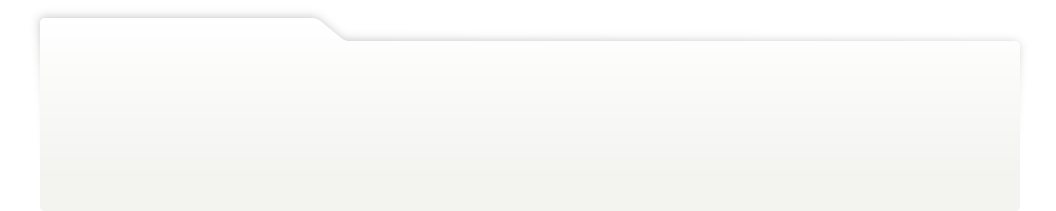
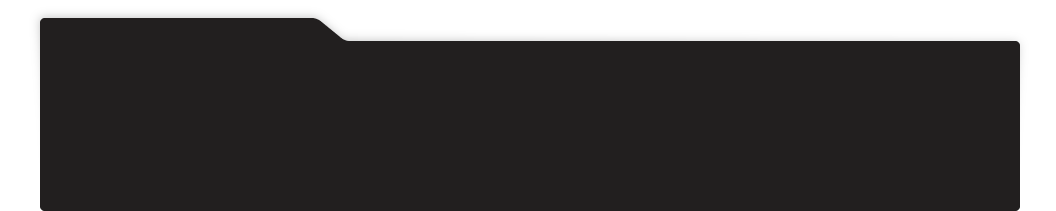
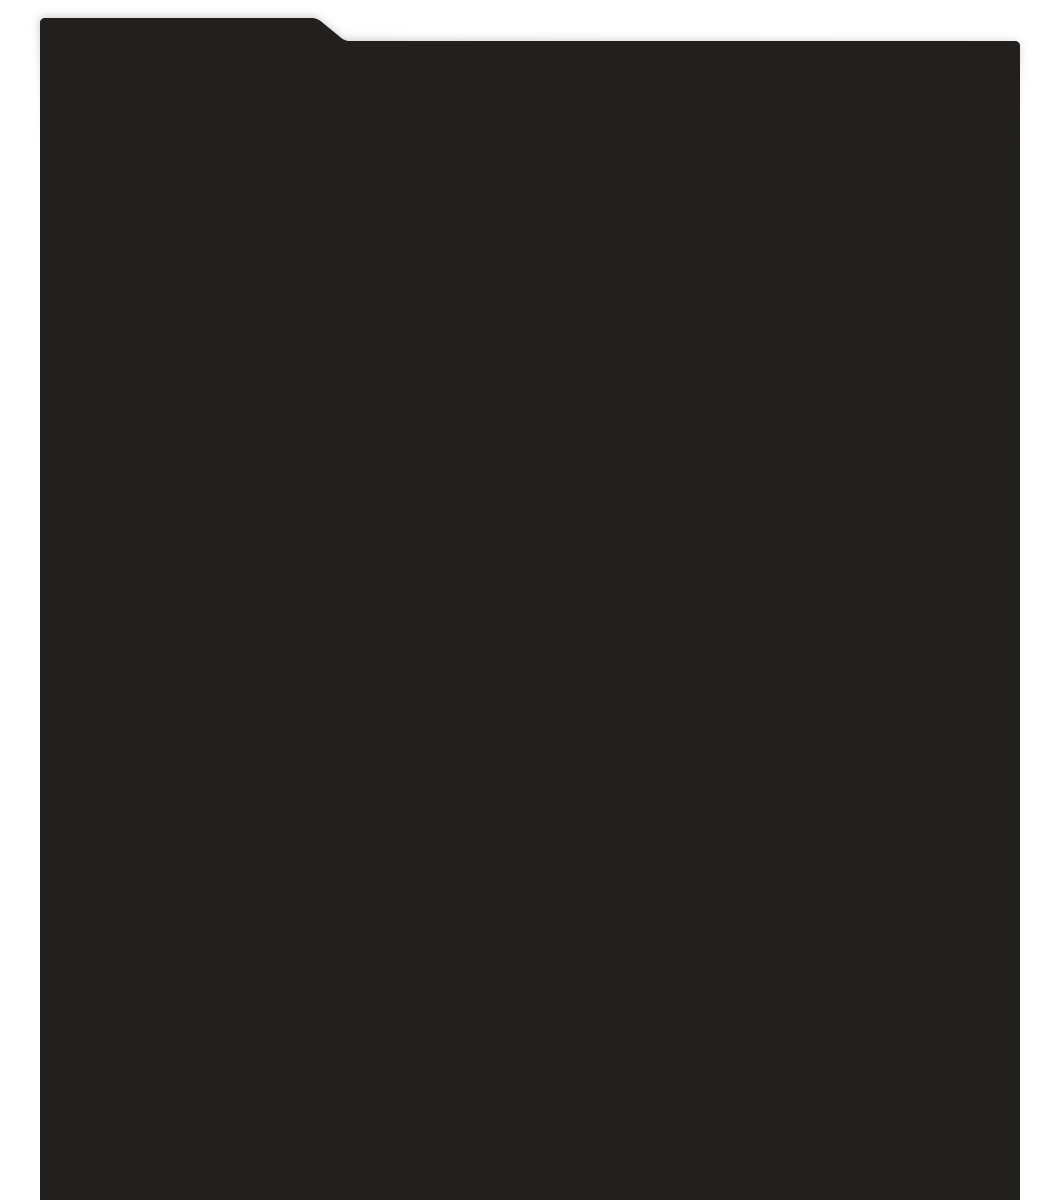
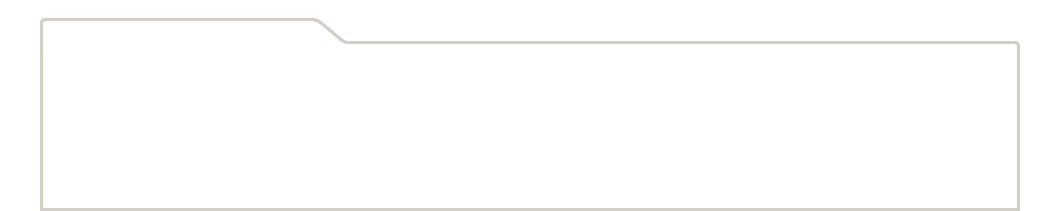
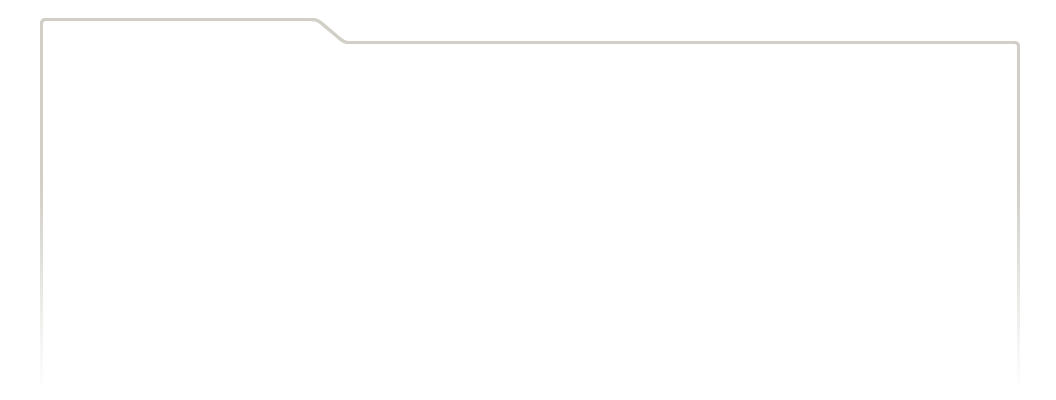
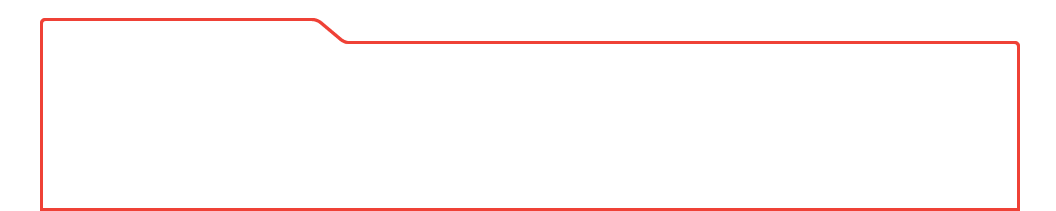
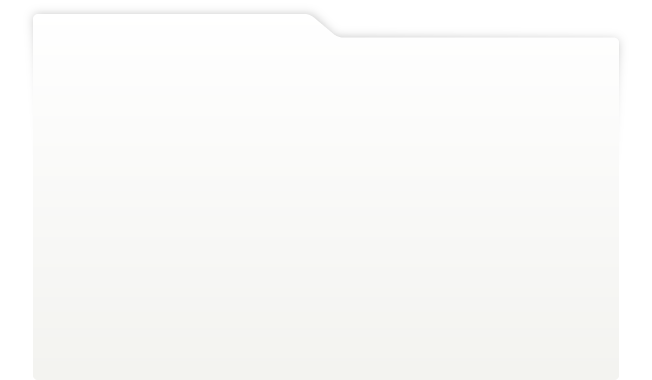
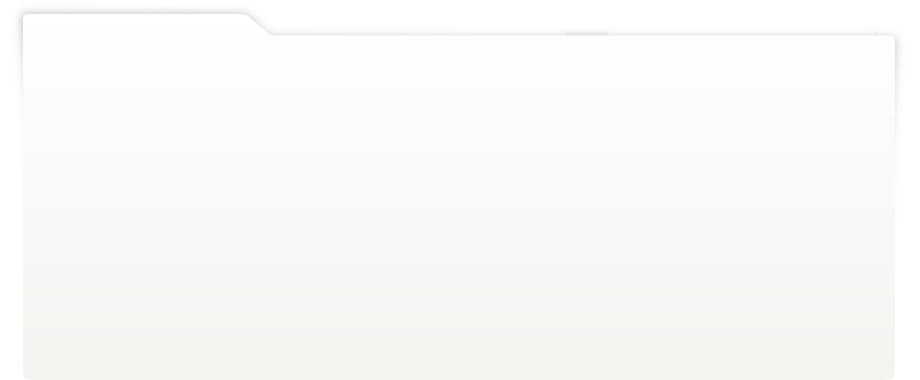
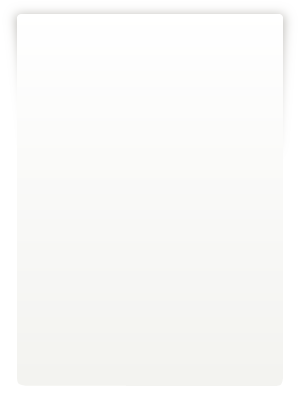
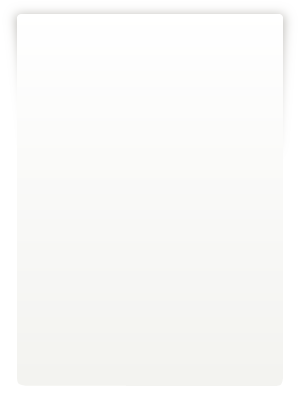
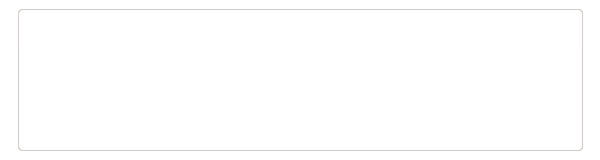
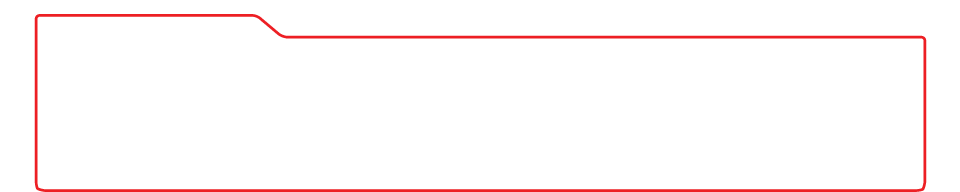
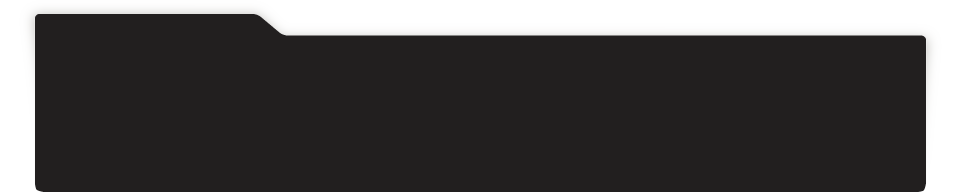
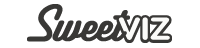
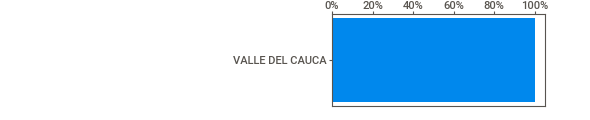
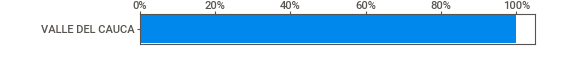
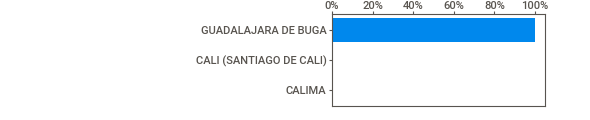
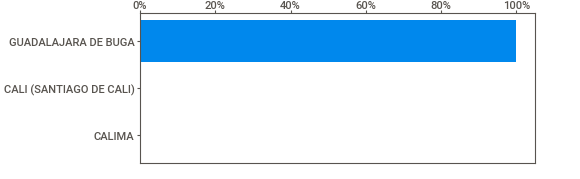
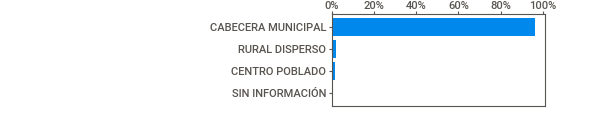
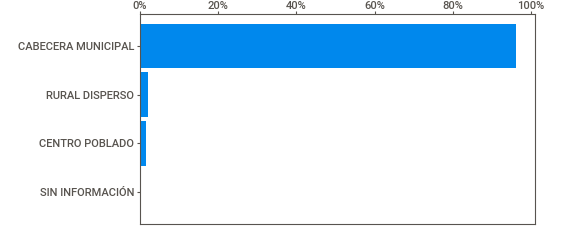
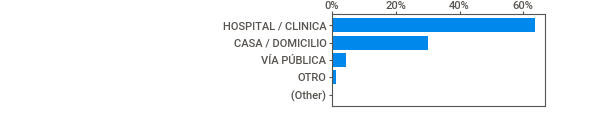
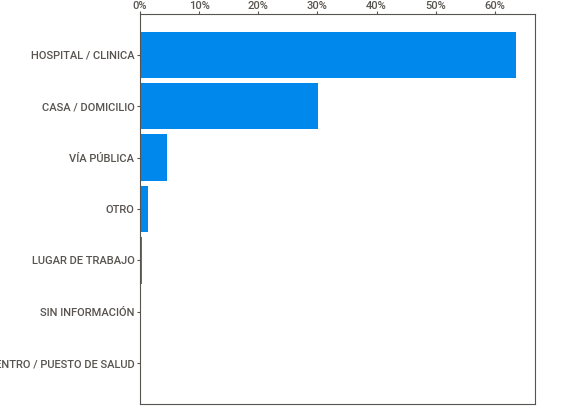
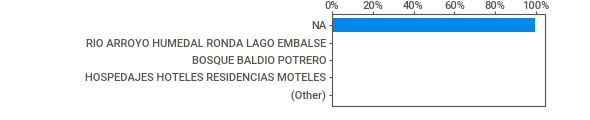
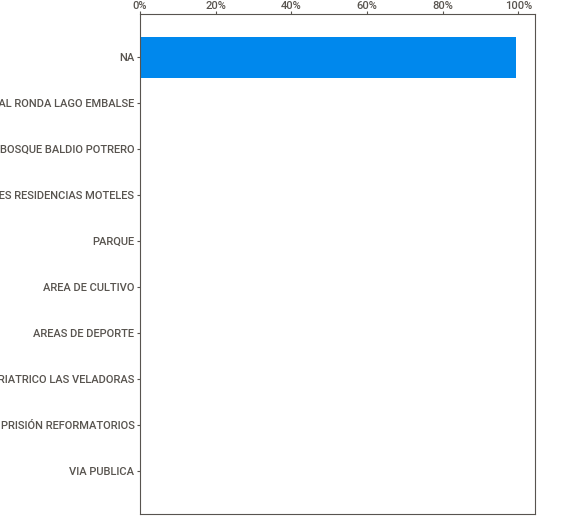
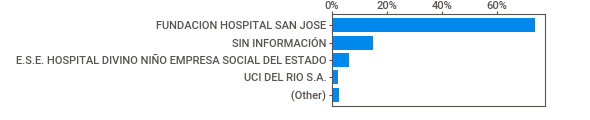
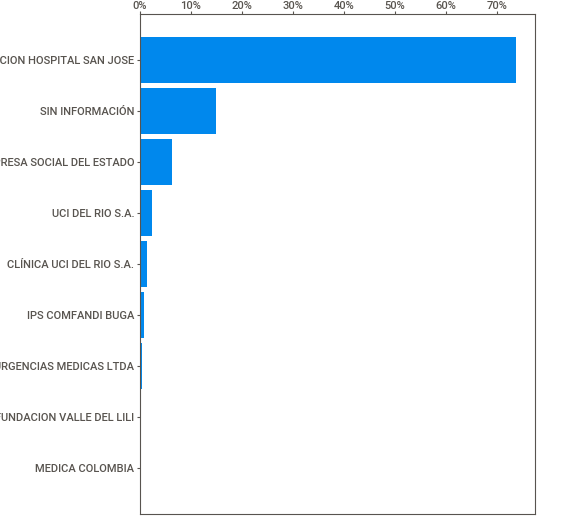
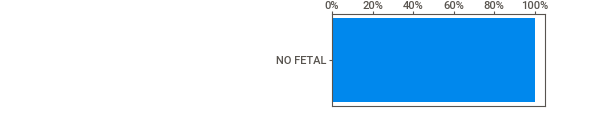
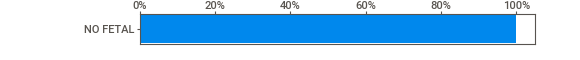
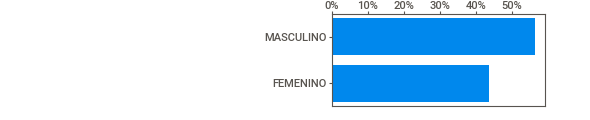
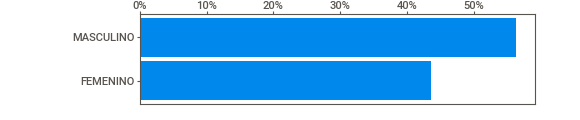
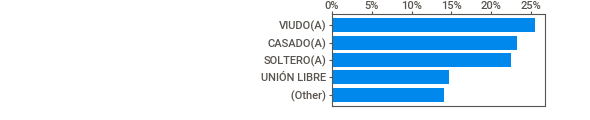
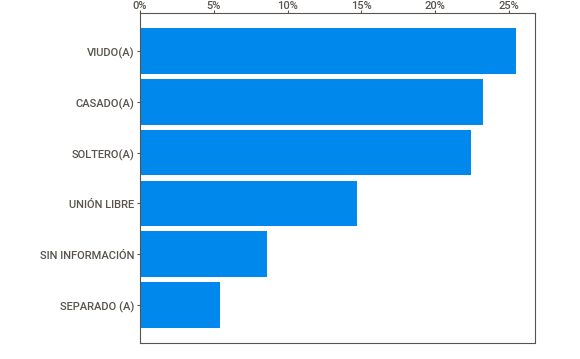
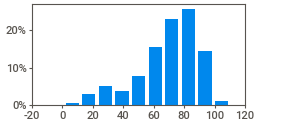
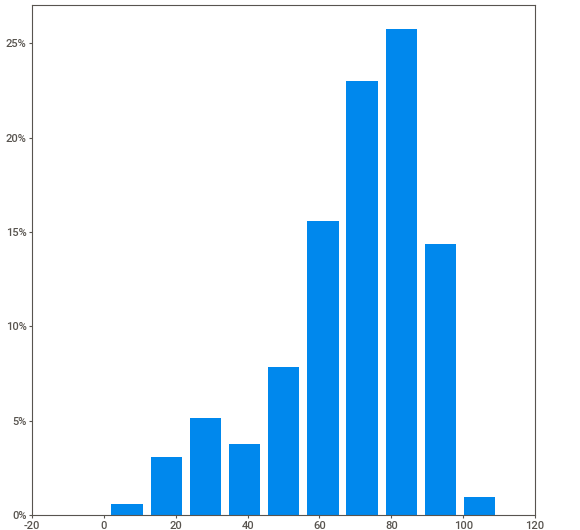
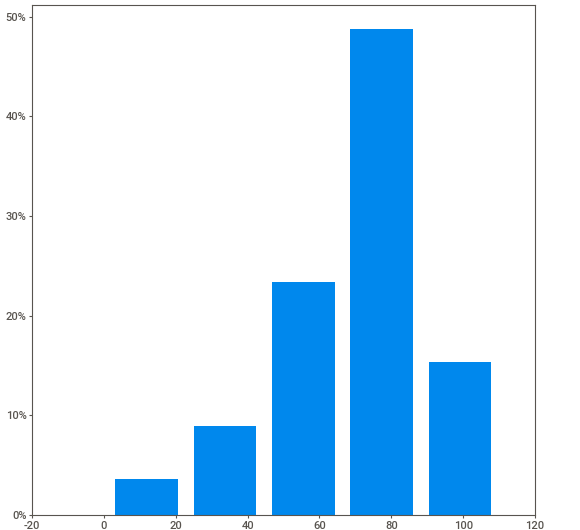
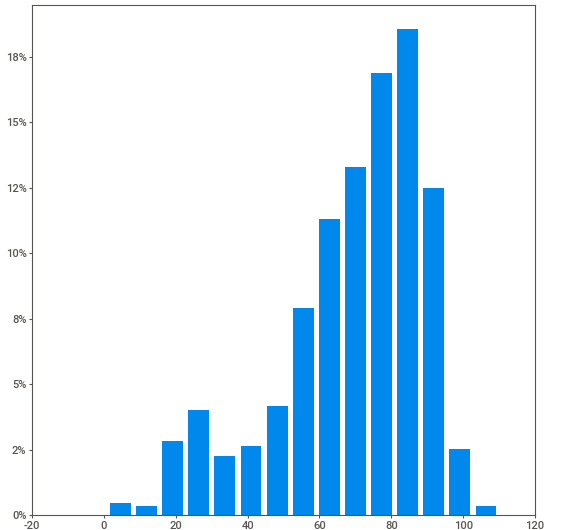
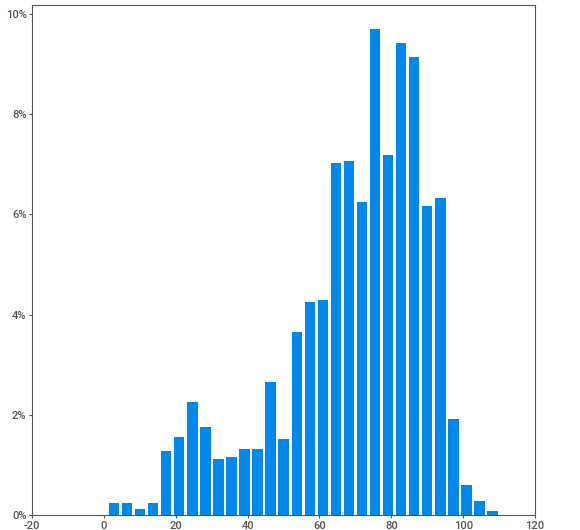
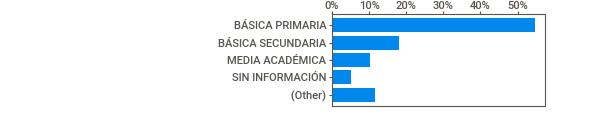
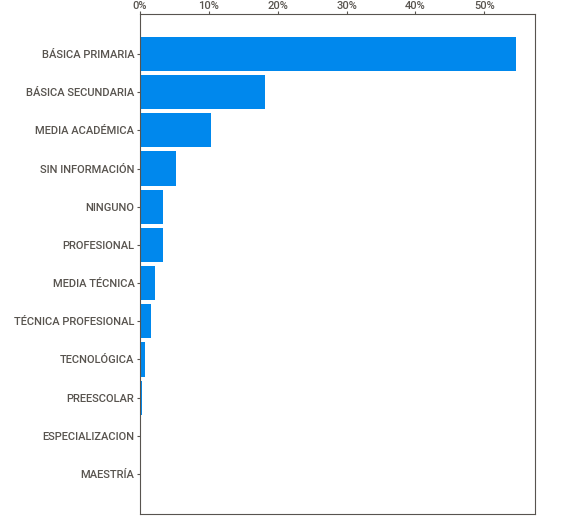
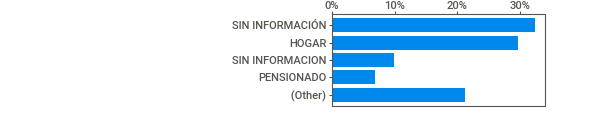
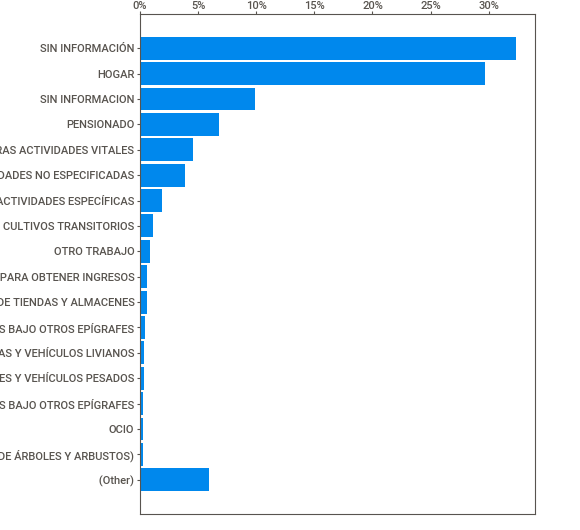
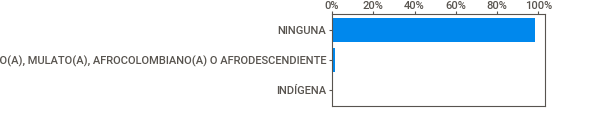
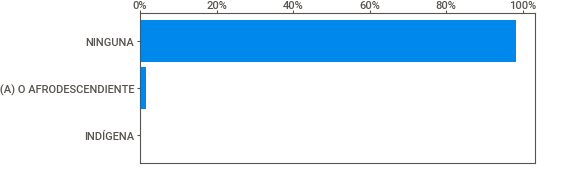
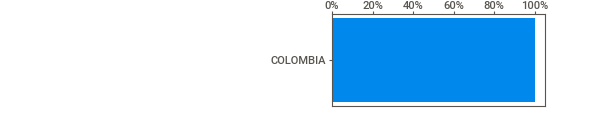
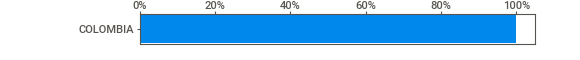
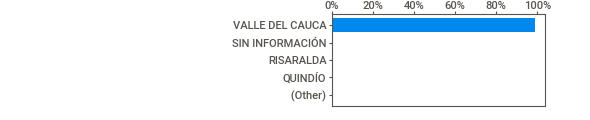
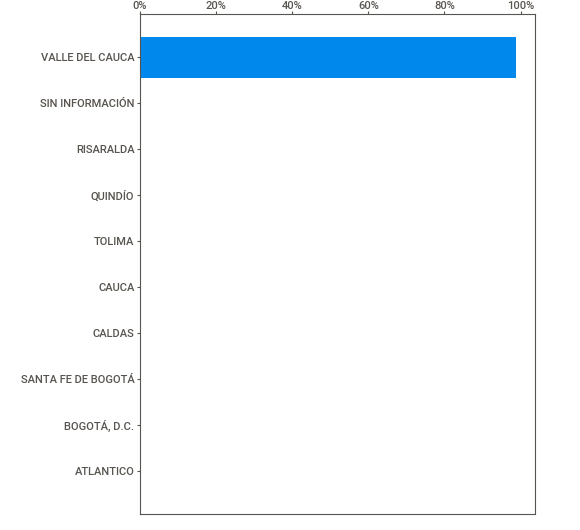
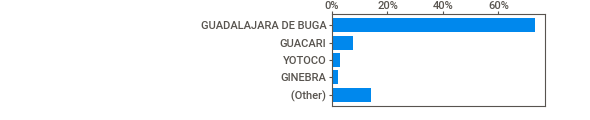
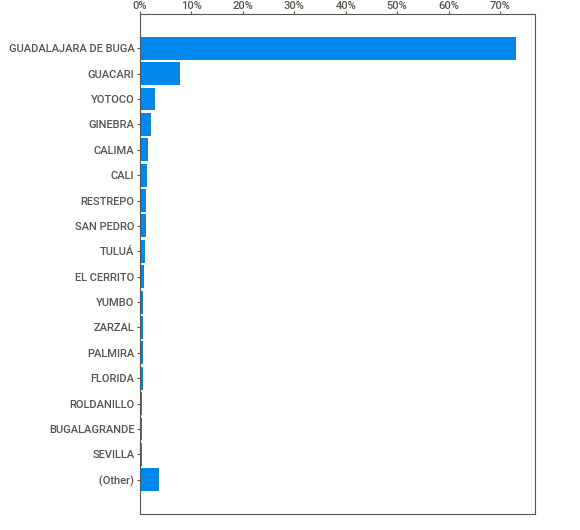
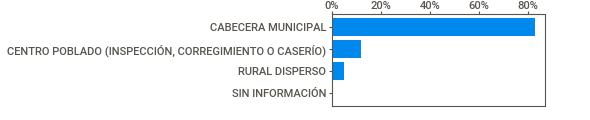
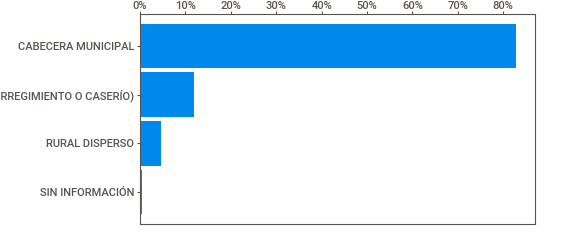
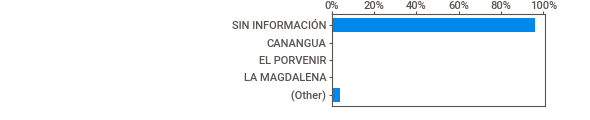
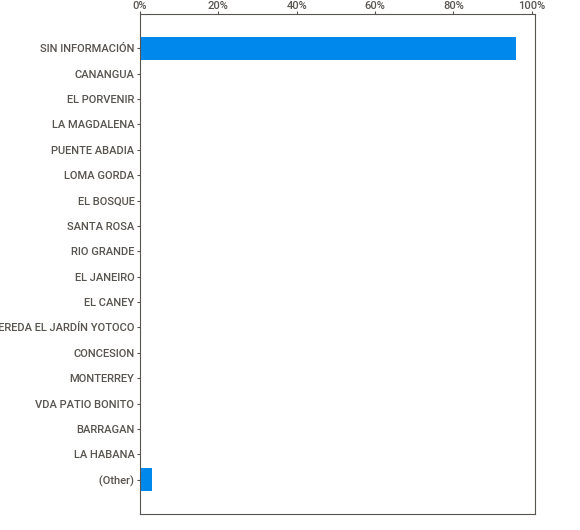
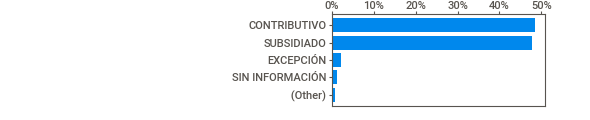
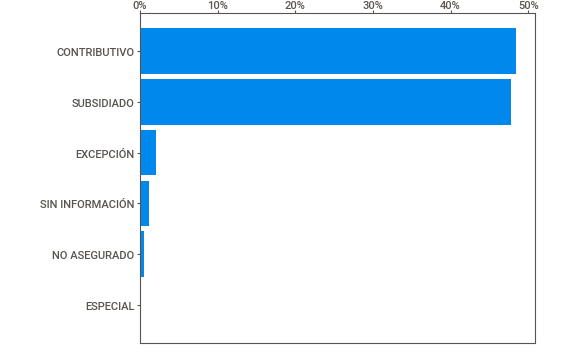
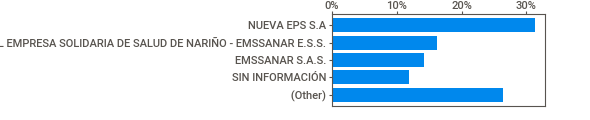
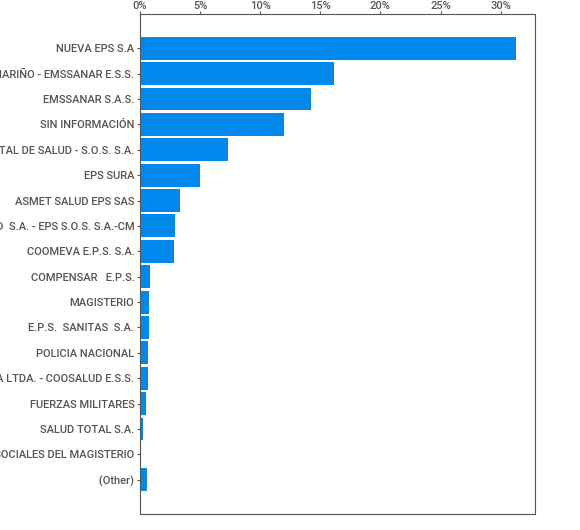
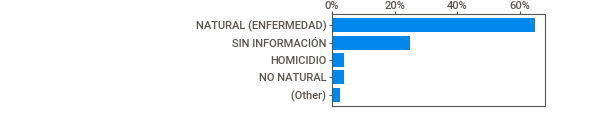
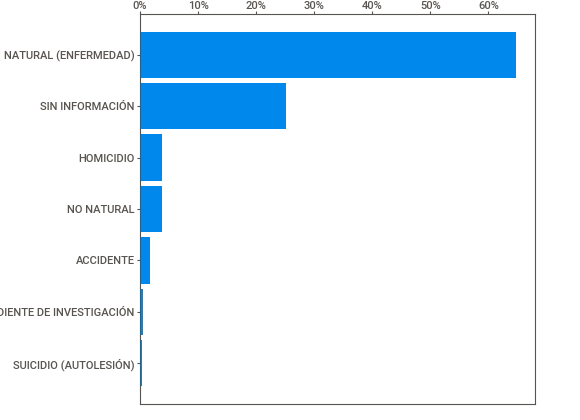
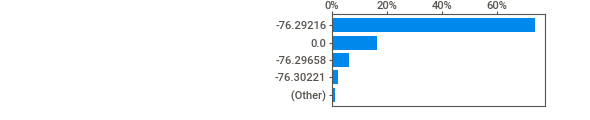
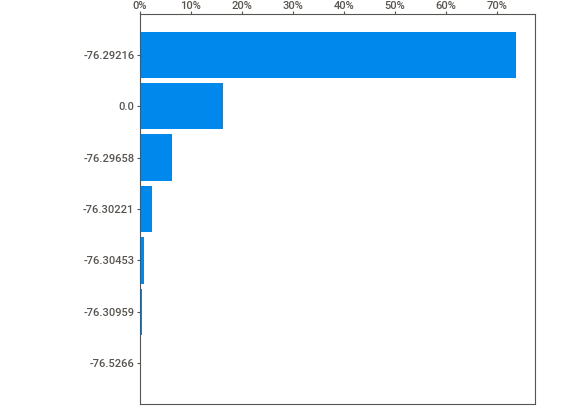
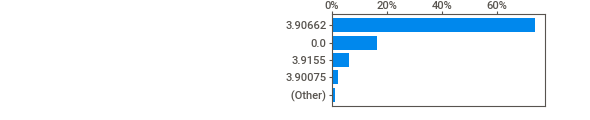
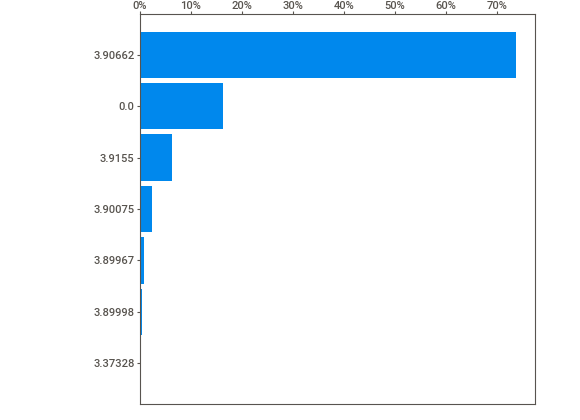
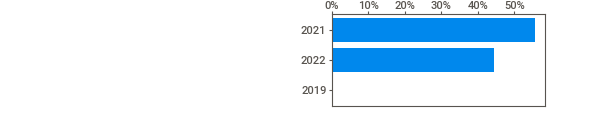
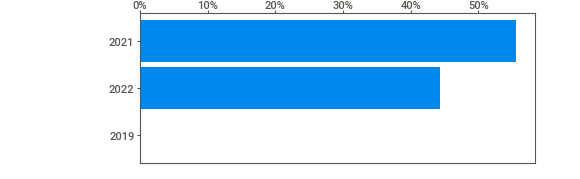
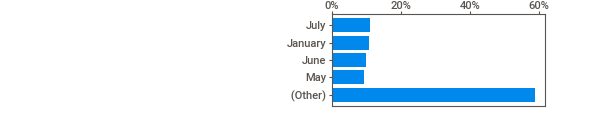
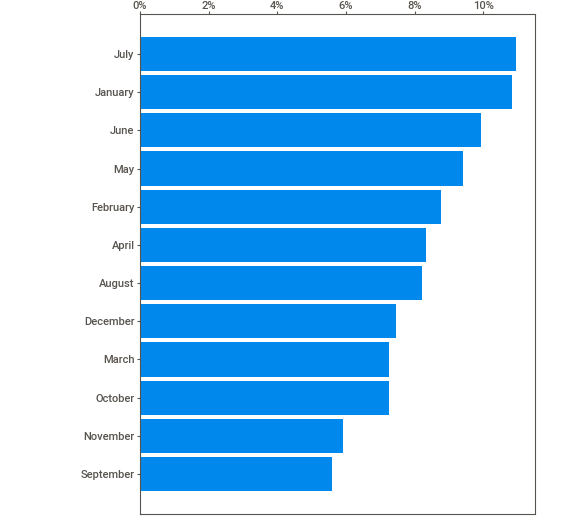
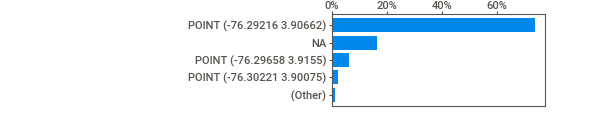
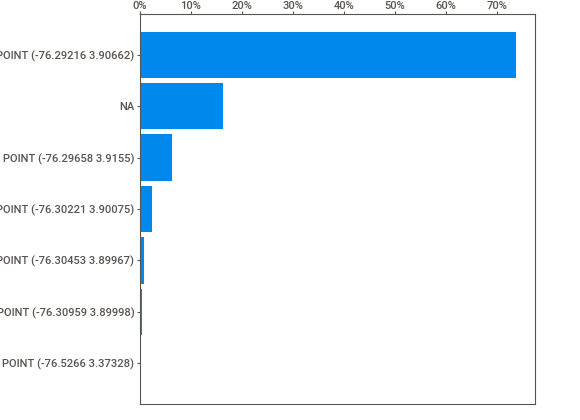
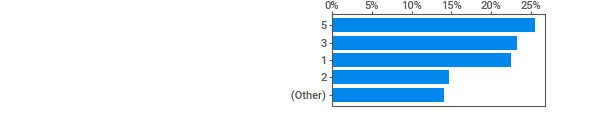
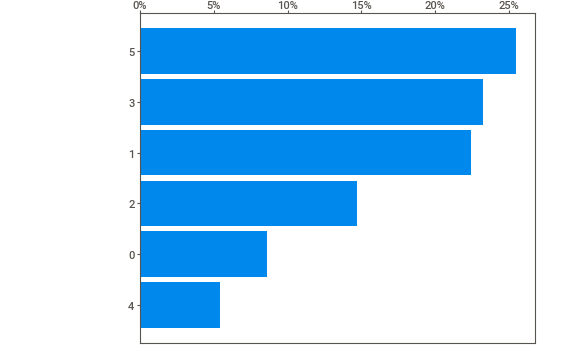
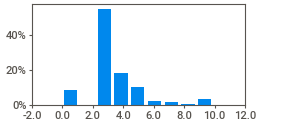
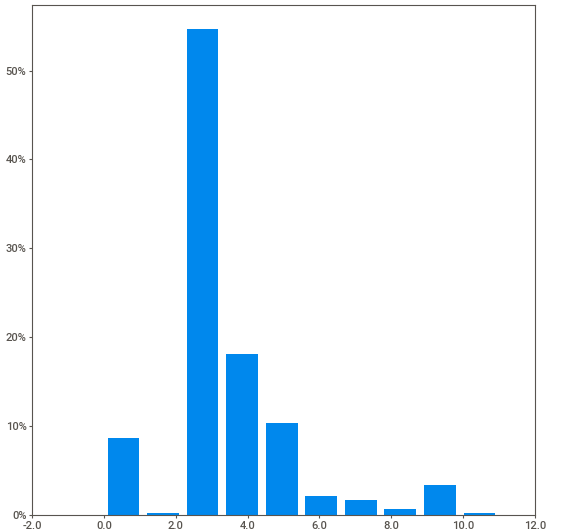
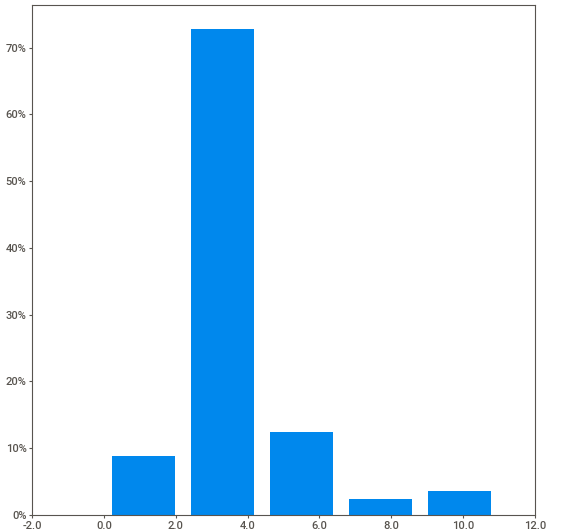
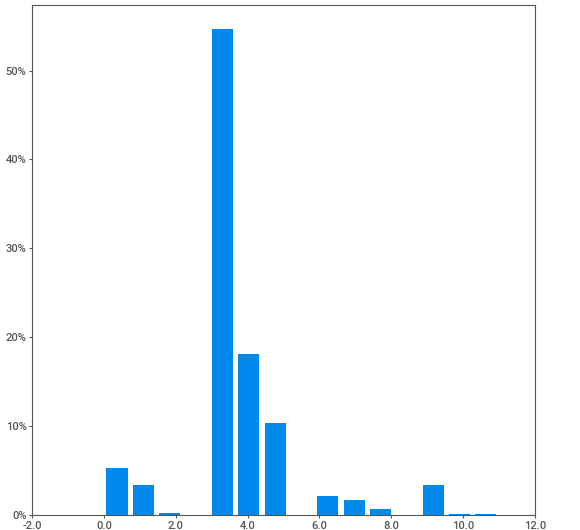
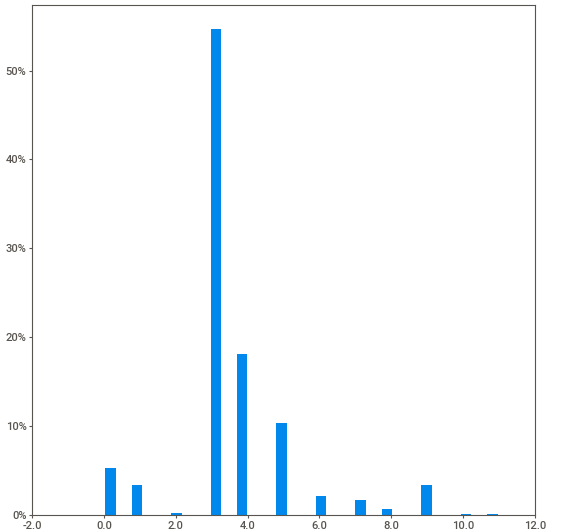
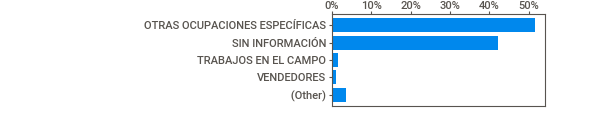
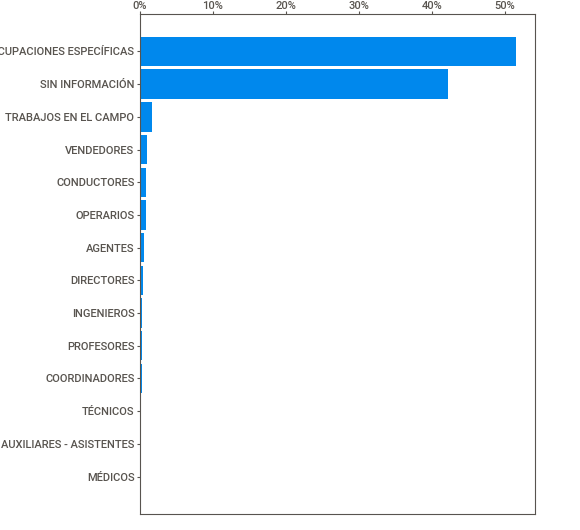
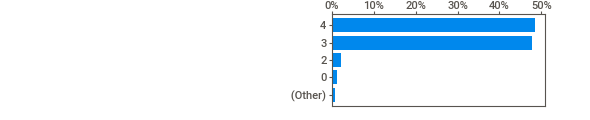
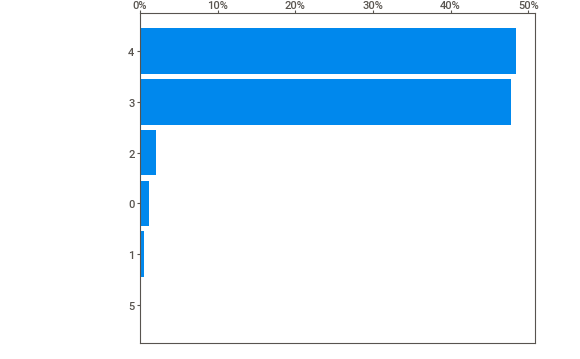
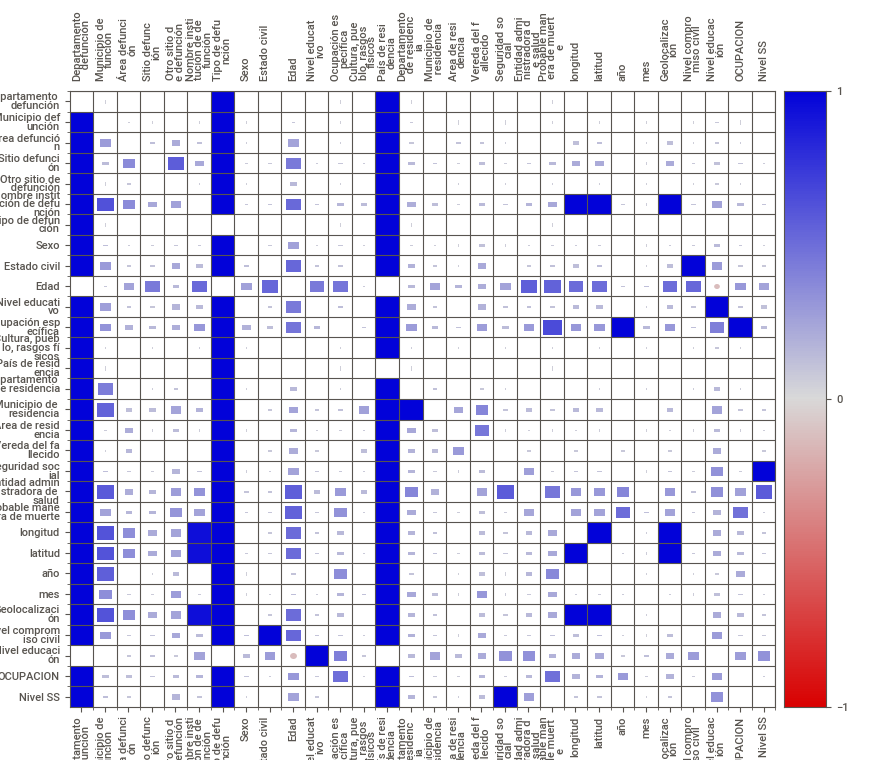
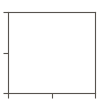

In [451]:
#ahora haremos una exploración rápida de las variables
EXP= sv.analyze(BDD)
EXP.show_notebook()

Teniendo en cuenta la exploración rápida de los datos para cada variable, tenemos lo siguiente: Todos los datos de defunciones de la base, son de personas que vivían y murieron en Colombia, del departamento del Valle del Cauca, principalmente en el municipio de Guadalajara de Buga con el 99%, sin embargo sus municipios de residencia variaban entre Buga con el 73% y Guacari con un 7%. La principal área de defunción ha sido la cabecera municipal con el 96% de los casos en diferentes barrios, 2% en área rural dispersa y 1% en un centro poblado.
En cuanto al sitio específico de defunción, el 64% ha fallecido en el hospital, el 30% en su casa, 5% en vías públicas y el otro 1% en otros lugares.
Las instituciones de salud en las que se han presentado mayor cantidad de fallecidos son la Fundación Hospital San José con el 74% de los casos, 6% en la E.S.E. Hospital Divino Niño y hay un 15% sin información.
Para el tipo de defunción, se ha tenido un 100% de defunciones de tipo No fetal, la mayoría de fallecidos han sido del sexo Masculino con el 56%, el 25% de fallecidos estaban viudos, el 23% estaban casados, el 22% solteros. La mayoría de fallecidos eran mayores de 50 años de edad, su nivel educativo era principalmente básica primaria (55%) y en segundo lugar básica secundaria con 15%. El 30% se ocupaba de su hogar y se tiene un 42% sin esta información de ocupación. En cuanto a rasgos físicos y cultura, la mayoría no tenía alguna clasificación (98%), solo un 2% era afrocolombiano y menos del 1% indígena.

La mayoría de fallecidos contaban con seguridad social: 48% Contributivo y 48% subsidiado, la EPS era principalmente Nueva EPS con el 31% y luego EMSSANAR E.S.S. con el 17%.

La muerte natural por enfermedad con un 65% es la que más se presentó. Se tiene un 25% de los casos sin información.

Los datos son principalmente de los años 2021 y 2022 y los meses con mayor cantidad d efallecidos fueron los meses de Julio y enero con 11% cada uno y luego Junio con el 10% de los casos.

In [452]:
# crear dataset para Cantidad de defunciones por Sexo y por año

BASE_A = BDD.groupby(['Sexo','año'])[['Fecha de Defunción']].count().reset_index()

# crear gráfica
fig_A = px.bar(BASE_A, x = 'año', y ='Fecha de Defunción', color ='Sexo', barmode = 'group')

# agregar detalles a la gráfica
fig_A.update_layout(
    title = '<b>Cantidad de defunciones por Sexo y por año<b>',
    xaxis_title = 'Año de defunción',
    yaxis_title = 'Número de defunciones',
    template = 'simple_white',
    title_x = 0.5)

fig_A.show()

Tanto en 2021 como en 2022, la mayoría de fallecidos fueron del sexo masculino.

In [453]:
# Crear dataset para Cantidad de defunciones por la Probable manera de muerte y por año
BASE_C = BDD.groupby(['Probable manera de muerte', 'año'])[['Fecha de Defunción']].count().reset_index()

# Crear gráfica
fig_C = px.bar(BASE_C, x='año', y='Fecha de Defunción', color='Probable manera de muerte', barmode='relative')

# Agregar detalles a la gráfica
fig_C.update_layout(
    title='<b>Cantidad de defunciones por la Probable manera de muerte y por año<b>',
    xaxis_title='Año de defunción',
    yaxis_title='Número de defunciones',
    template='simple_white',
    title_x=0.5
)

fig_C.show()

Tanto en 2021 como en 2022, la mayoría de muertes fueron de manera natural por enfermedad, sin embargo hay una buena proporción sin información en el 2022. En 2021 se dió una porción de homicidios y en 2022 se cataloga como muerte no natural.

In [454]:
import plotly.express as px

# Crear dataset para Cantidad de defunciones por Edad y por año
BASE_E = BDD.groupby(['Nivel educativo', 'Estado civil'])[['Fecha de Defunción']].count().reset_index()

# Crear gráfica
fig_E = px.bar(BASE_E, x='Estado civil', y='Fecha de Defunción', color='Nivel educativo', barmode='stack')

# Agregar detalles a la gráfica
fig_E.update_layout(
    title='<b>Cantidad de defunciones por Estado civil y por Nivel educativo<b>',
    xaxis_title='Estado civil',
    yaxis_title='Número de defunciones',
    template='simple_white',
    title_x=0.5
)

fig_E.show()

In [455]:
# crear dataset para Cantidad de defunciones por mes y por Probable manera de muert

BASE_F = BDD.groupby(['mes','Probable manera de muerte'])[['Fecha de Defunción']].count().reset_index()

# crear gráfica
fig_F = px.bar(BASE_F, x = 'mes', y ='Fecha de Defunción', color ='Probable manera de muerte', barmode = 'stack')

# agregar detalles a la gráfica
fig_F.update_layout(
    title = '<b>Cantidad de defunciones por mes y por Probable manera de muerte<b>',
    xaxis_title = 'Probable manera de muerte',
    yaxis_title = 'Número de defunciones',
    template = 'simple_white',
    title_x = 0.5)



la mayoría de meses domina la mkuerte por enfermedad, en todos está presente  la muerte por homicidio y una baja proporción por accidentes.

In [456]:
# crear dataset para Cantidad de defunciones porEdad y por Probable manera de muert

BASE_G = BDD.groupby(['Edad','Probable manera de muerte'])[['Fecha de Defunción']].count().reset_index()

# crear gráfica
fig_G = px.bar(BASE_G, x = 'Probable manera de muerte', y ='Fecha de Defunción', color ='Edad', barmode = 'group')

# agregar detalles a la gráfica
fig_G.update_layout(
    title = '<b>Cantidad de defunciones por Edad y por Probable manera de muerte<b>',
    xaxis_title = 'Probable manera de muerte',
    yaxis_title = 'Número de defunciones',
    template = 'simple_white',
    title_x = 0.5)

fig_G.show()

Cuando se observa la información pór manera de morir y su distribución de edades, se puede decir que la muerte por enfermedad predomina en personas mayores de 50 años, mientras que para el resto de maneras predominan edades inferiores a 50 años.

In [457]:
#Veamos la Entidad administradora de salud para las defunciones cuya "probable manera de muerte" fue la "NATURAL (ENFERMEDAD)"
# crear dataset para MUERTE NATURAL

base_H = BDD[BDD['Probable manera de muerte'].isin(['NATURAL (ENFERMEDAD)'])]
base_H = base_H.groupby(['Probable manera de muerte','Entidad administradora de salud'])[['Fecha de Defunción']].count().reset_index()

# crear gráfica
fig_H = px.bar(base_H, x='Entidad administradora de salud', y='Fecha de Defunción', color ='Probable manera de muerte', barmode ='group', title ='<b>Entidad administradora de salud para las defunciones cuya "probable manera de muerte" fue la "NATURAL (ENFERMEDAD)"<b>')

# agregar detalles a la gráfica
fig_H.update_layout(
    xaxis_title = 'Entidad administradora de salud',
    yaxis_title = 'N° de defunciones',
    template = 'simple_white',
    title_x = 0.5)

fig_H.show()

Cuando se quiere ver la información de fallecidos por enfermedad y su EPS, se tiene que la mayoría pertenecían a La Nueva EPS, y EMSSANAR

<Axes: >

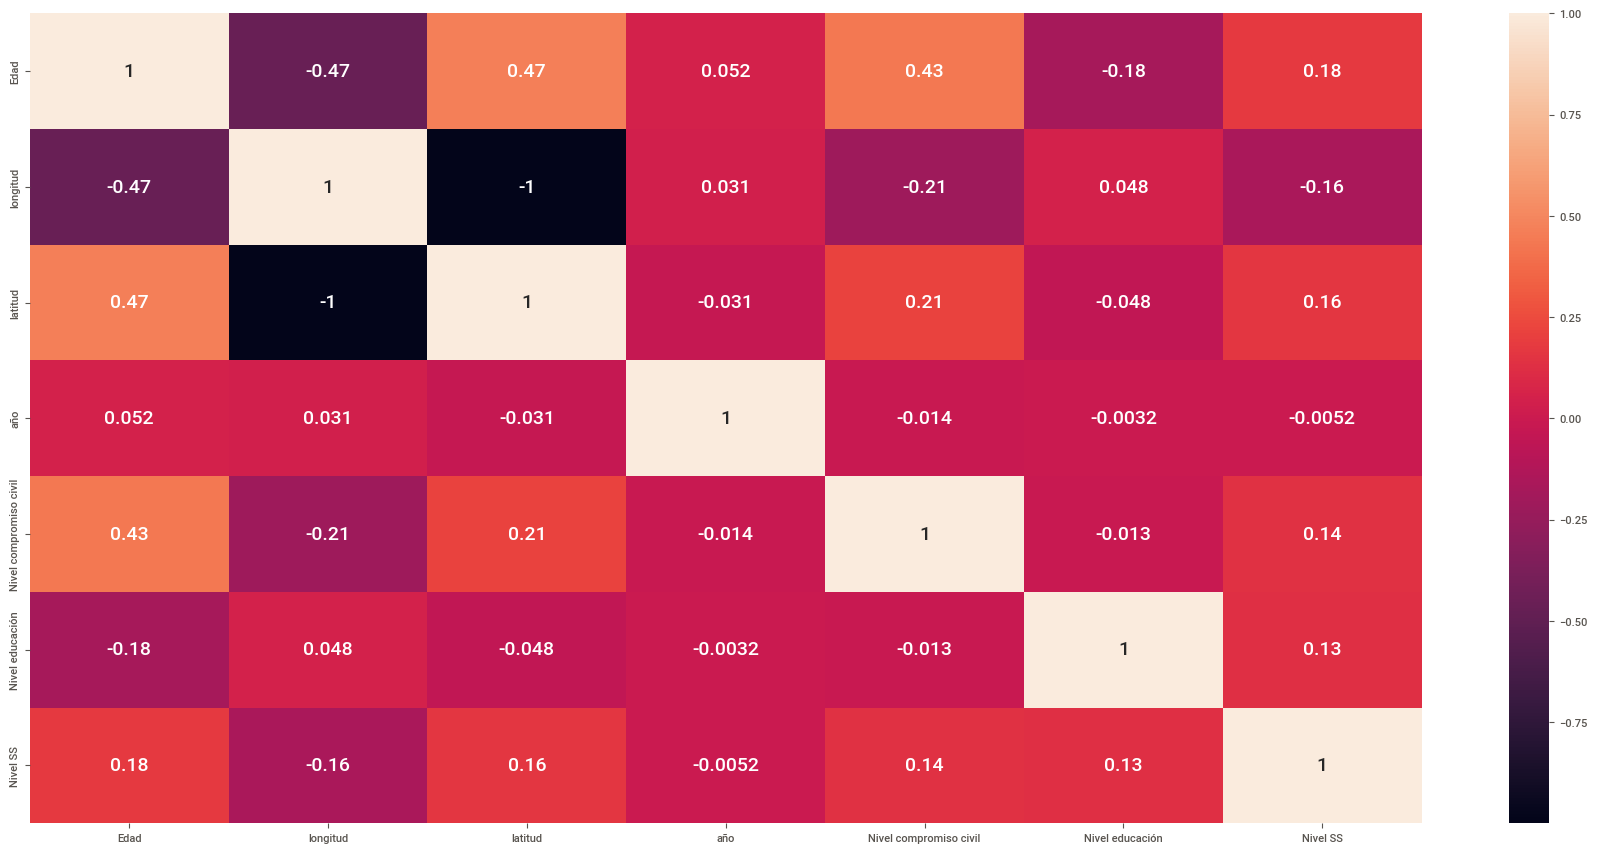

In [458]:
# Matriz de correlación
plt.figure(figsize=(20,10))
c= BDD.corr()
sns.heatmap(c, annot=True)
#Solo se observa una correlación baja entre la edad y el nivel de compromiso.

#Aplicación de Algoritmo K-means

##Creación de dataset

In [503]:
#Para poder continuar, debemos ajustar la base y sus variables, pasándolas a númericas

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separar variables numéricas y categóricas (Esto es importante para poder aplicar diferentes transformaciones a cada tipo de variable)
numeric_features = ['Edad', 'año', 'Nivel educación', 'Nivel compromiso civil', 'Nivel SS']
categorical_features = ['Municipio defunción', 'Área defunción','Sexo','Barrio de fallecido','Entidad administradora de salud', 'Probable manera de muerte','mes']

# Crear transformador de columnas (Para las variables numéricas, se aplica una estandarización ( StandardScaler), que escala las características de manera que tengan una media de 0 y una desviación estándar de 1.
#Para las variables categóricas, se aplica un codificador one-hot ( OneHotEncoder), que convierte las variables categóricas en una representación binaria.)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)])

# Crear un pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Aplicar el preprocesamiento a tus datos
X_processed = pipeline.fit_transform(BDD)
#El resultado ( X_processed) es la base de datos con las transformaciones aplicadas.

In [504]:
#Creación de clusters desde la base procesada

# Obtener el número de muestras y características (n_samples representa el número de muestras (filas), y n_features representa el número de características (columnas).)
n_samples, n_features = X_processed.shape

# Definir el número de centros (clusters)
centers = 3 ###ESTO PODEMOS CAMBIARLO

# Definir la desviación estándar (cluster_std)
cluster_std = 1.0 ###ESTO PODEMOS CAMBIARLO

# Generar el conjunto de datos sintético
synthetic_data, true_labels = make_blobs(n_samples=n_samples,
                                         n_features=n_features,
                                         centers=centers,
                                         cluster_std=cluster_std,
                                         random_state=42)


In [505]:
# Extraer las características de la base de datos en un arreglo NumPy
features = synthetic_data

#Mostrar las cinco primeras filas
features[:5]

#En resumen, se trata de una matriz dispersa de 5 filas y 1354 columnas con 150 elementos distintos de cero almacenados.

array([[-1.50239624,  8.07589356,  6.56954687, ..., -5.38652229,
        -0.81864412,  5.17323139],
       [-2.87999645,  9.82057014,  5.43249929, ..., -3.72372707,
         1.24257479,  5.3590282 ],
       [-7.4883547 ,  8.13381967,  1.41422699, ..., -2.50870874,
        -4.10062241, -3.55528209],
       [ 4.7323011 , -3.30635258,  9.65651161, ..., -4.55447969,
        -5.43142183, -1.84374996],
       [-1.05257033,  9.763313  ,  4.0525433 , ..., -4.78032017,
         1.15963724,  4.66405314]])

In [506]:
#Esto permite ver una muestra inicial de las etiquetas reales asociadas a las primeras muestras del conjunto de datos.
true_labels[:5]

array([0, 0, 2, 1, 0])

##Preprocesamiento de los datos

In [507]:
from sklearn.preprocessing import StandardScaler
from scipy.sparse import csr_matrix

# Convertir a un formato compatible con scipy.sparse
X_sparse = csr_matrix(features)

# Crear un objeto StandardScaler para matrices dispersas
scaler = StandardScaler(with_mean=False) #no se centran las características en cero

# Aplicar el escalamiento
scaled_features = scaler.fit_transform(features)


In [508]:
#obtener las primeras cinco filas de un conjunto de datos que ha sido escalado. Esto mostrará una muestra de cómo se ven las primeras cinco muestras después de aplicar la escalada
scaled_features[:5]

array([[-0.33342025,  1.3181371 ,  2.11072458, ..., -3.55065597,
        -0.26654958,  1.41115009],
       [-0.63914507,  1.602901  ,  1.74540345, ..., -2.45458443,
         0.40458092,  1.4618316 ],
       [-1.66185794,  1.32759173,  0.45437588, ..., -1.65367582,
        -1.33515795, -0.96980712],
       [ 1.05021897, -0.53965867,  3.10253306, ..., -3.00219505,
        -1.76846471, -0.5029367 ],
       [-0.23359235,  1.59355556,  1.30203847, ..., -3.15106324,
         0.37757655,  1.27225684]])

##Algoritmo K-means

In [509]:
# Creación de modelo de Kmeans
kmeans = KMeans(init="random",
                n_clusters=3,
                n_init=10,
                max_iter=100,
                random_state=42)

In [510]:
# Ajuste de algoritmo a caracteristicas escaladas
kmeans.fit(scaled_features)

KMeans(init='random', max_iter=100, n_clusters=3, n_init=10, random_state=42)

In [511]:
# el valor del SSE mas bajo
print("valor del SSE mas bajo: ", kmeans.inertia_)

# Coordenadas de los centroides
print(kmeans.cluster_centers_)

# Numero de interaciones necesarias para converger
print("Numero de iteraciones: ",kmeans.n_iter_)

valor del SSE mas bajo:  92407.10016004073
[[ 7.15197157e-01 -7.09920616e-01  2.92611845e+00  3.14868001e+00
   1.96038671e-01  5.75380176e-01 -4.89486766e-01 -9.79536848e-01
  -1.17573102e+00  4.68797818e+00 -2.41806860e+00 -9.53549000e-01
  -1.36198725e+00 -3.28291916e+00  1.24903083e+00  8.97903115e-01
  -2.92131316e-01 -1.10061826e+00 -9.96548965e-02 -2.25602249e-01
  -1.40695784e+00 -4.47994684e-01 -1.23855423e+00  5.97646866e-01
   7.05310667e-01 -1.44976795e+00 -1.21823890e+00  7.55231643e-01
   1.09463756e-02  1.05950869e+00  1.32986223e+00 -8.67792394e-01
  -8.00975254e+00  6.14777096e-01 -1.06019045e+00  6.58679772e-01
   1.57093143e+00  3.69132104e-01 -5.08380574e-01  1.25034980e+00
  -1.19728979e-01  8.25086833e-01  1.17797607e+00 -4.02585691e-01
   1.53501252e+00  1.33859129e+00 -3.93251979e+00 -2.14706207e+00
  -1.91502045e+00 -4.49572402e+00 -9.87762426e-01  2.19277262e+00
  -1.14900242e+00 -7.56885928e-01  1.18311540e+00 -1.29011230e+00
   1.03414429e+00 -1.99192257e+00

In [512]:
# Etiqueta de los datos generadas por Kmeans
kmeans.labels_[:5]

array([2, 2, 1, 0, 2], dtype=int32)

In [513]:
#Predecir valores de etiquetas
label = kmeans.fit_predict(scaled_features)

print(label)

[2 2 1 ... 2 2 1]


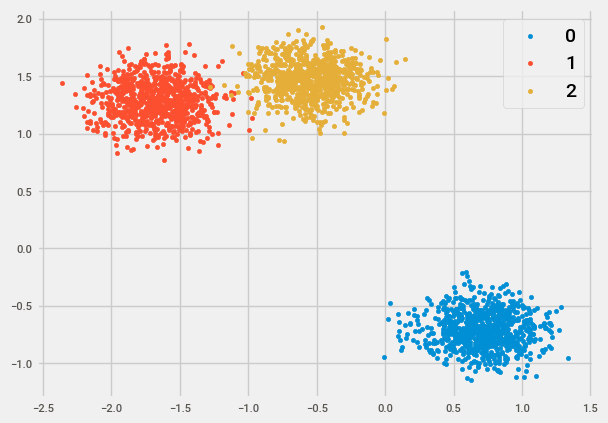

In [514]:
#Obtener valores unicos de cluster
# definidos correctamente y que estén en un formato que pueda ser indexado de esta manera.)

u_labels = np.unique(label)

#Diagramar el resultado:
for i in u_labels:
    plt.scatter(scaled_features[label == i,0] , scaled_features[label == i,1] , label = i)
plt.legend()
plt.show()

##Elección del número apropiado de clústeres

###Método del codo

In [515]:
# Argumentos del algoritmo
kmeans_kwargs = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 42}
# Lista que almacena los valores de SSE para cada valor K
sse = []
# Ciclo para entrenar algoritmos de kmeans con cada valor de k
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_features)
  sse.append(kmeans.inertia_)

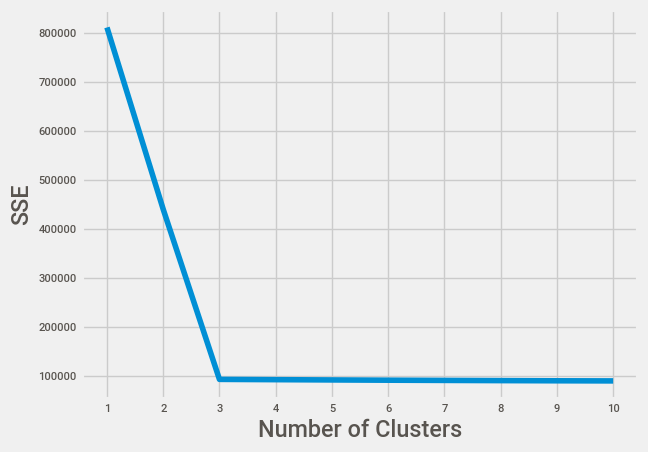

In [516]:
# Visualización de resultados
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [517]:
# Seleccion automatica del numero k
kl = KneeLocator(range(1, 11),
                 sse, curve="convex",
                 direction="decreasing")

kl.elbow

3

###Coeficiente de silueta

In [518]:
# Lista contiene los coeficientes de silueta para cada k
silhouette_coefficients = []
# Fíjate que empiezas con 2 grupos para el coeficiente de silueta
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_features)
  score = silhouette_score(scaled_features, kmeans.labels_)
  silhouette_coefficients.append(score)

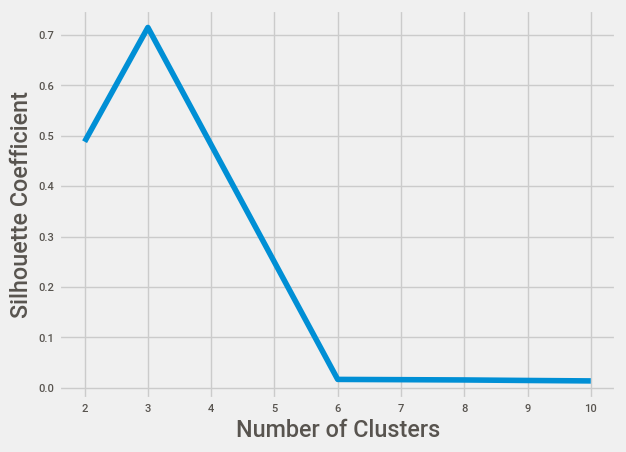

In [519]:
# Visualización de resultados
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

#Aplicación de algoritmo Hierarchical Clustering

In [476]:
BDD.head()

,Departamento defunción,Municipio defunción,Área defunción,Sitio defunción,Otro sitio de defunción,Nombre institución de defunción,Tipo de defunción,Fecha de Defunción,Sexo,Estado civil,...,Probable manera de muerte,longitud,latitud,año,mes,Geolocalización,Nivel compromiso civil,Nivel educación,OCUPACION,Nivel SS
1579,VALLE DEL CAUCA,CALI (SANTIAGO DE CALI),CABECERA MUNICIPAL,HOSPITAL / CLINICA,NA,FUNDACION VALLE DEL LILI,NO FETAL,2019-11-08,FEMENINO,SOLTERO(A),...,HOMICIDIO,-76.52660,3.37328,2019,November,POINT (-76.5266 3.37328),1,1,SIN INFORMACIÓN,4
2752,VALLE DEL CAUCA,GUADALAJARA DE BUGA,CABECERA MUNICIPAL,HOSPITAL / CLINICA,NA,URGENCIAS MEDICAS LTDA,NO FETAL,2021-01-02,MASCULINO,SIN INFORMACIÓN,...,NATURAL (ENFERMEDAD),-76.30959,3.89998,2021,January,POINT (-76.30959 3.89998),0,5,SIN INFORMACIÓN,4
2753,VALLE DEL CAUCA,GUADALAJARA DE BUGA,CABECERA MUNICIPAL,CASA / DOMICILIO,NA,FUNDACION HOSPITAL SAN JOSE,NO FETAL,2021-01-03,FEMENINO,VIUDO(A),...,NATURAL (ENFERMEDAD),-76.29216,3.90662,2021,January,POINT (-76.29216 3.90662),5,4,OTRAS OCUPACIONES ESPECÍFICAS,3
2754,VALLE DEL CAUCA,GUADALAJARA DE BUGA,CABECERA MUNICIPAL,HOSPITAL / CLINICA,NA,FUNDACION HOSPITAL SAN JOSE,NO FETAL,2021-01-03,MASCULINO,SOLTERO(A),...,NATURAL (ENFERMEDAD),-76.29216,3.90662,2021,January,POINT (-76.29216 3.90662),1,3,OTRAS OCUPACIONES ESPECÍFICAS,4
2755,VALLE DEL CAUCA,GUADALAJARA DE BUGA,CABECERA MUNICIPAL,HOSPITAL / CLINICA,NA,FUNDACION HOSPITAL SAN JOSE,NO FETAL,2021-01-03,MASCULINO,CASADO(A),...,NATURAL (ENFERMEDAD),-76.29216,3.90662,2021,January,POINT (-76.29216 3.90662),3,4,OPERARIOS,4


In [477]:
# Separación de caracteristicas
X = BDD.iloc[:,24:27]
print(X.shape)
X.head()

(2518, 3)


,latitud,año,mes
1579,3.37328,2019,November
2752,3.89998,2021,January
2753,3.90662,2021,January
2754,3.90662,2021,January
2755,3.90662,2021,January


##Uso del dendrograma para encontrar el número óptimo de clusters

In [478]:
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as sch

# Función de vinculación para agrupar datos según similud
Z = linkage(X, method='ward', metric='euclidean')
Z[:5]

ValueError: ignored

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
# Dibujo del dendograma
labelList = list(BDD['Municipio defunción'])

plt.figure(figsize=(13, 12))
dendrogram(
    Z,
    orientation='right',
    labels=labelList,
    distance_sort='descending',
    show_leaf_counts=False,
    leaf_font_size=16
)
plt.show()

##Entrenamiento del modelo de agrupación jerárquica en el conjunto de datos

In [ ]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 2, metric = 'euclidean', linkage = 'ward')

y_hc = hc.fit_predict(X)

print(hc.labels_)

##Incorporando los clusters al dataframe original

In [ ]:
BDD['cluster'] = y_hc
BDD.head()